In [ ]:
! pip install yfinance

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
!pip install eli5

In [17]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41444 sha256=03610c293b24e858340bb140f5b1fa273f737f9fbbbeef7306cf1178524cd936
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [54]:
!pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.9-py3-none-any.whl size=57899 sha256=d05bcf82dcd929fef2e37c9593f04eb3b7578e5166566ffe35053054b2ecc488
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\2c\f5\d9\52c831e918b10c3137cf83805454583b62d2cdfd121a171172
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32157 sha256=9c36c055ba0c5d786403eb389654e8f6bd3891dce3a86105d092061b357af36e
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\fb\24\13\4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=02e6b7a1c0d452fa0873c753a35f1528b3515f55a7265d0aecc1c6a14e07bc5b
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText


In [1]:
# Modules Importation
import pandas as pd
import csv
import yfinance as yf
from datetime import date
import numpy as np
import random
from statistics import mean
from collinearity import SelectNonCollinear
from scipy.stats import uniform
from scipy.stats import randint
import itertools
import dateutil.parser
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
import sklearn
from sklearn import datasets, svm
import sklearn.metrics as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from bioinfokit.visuz import cluster

################
### Set DataFrame parameters
################ 
pd.set_option('display.max_colwidth', None)

In [2]:
# COVID Data Import 
covid_data=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data = covid_data[covid_data['location']== 'Portugal']
covid_data=covid_data.drop(columns=['population','iso_code','continent','location','total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','total_vaccinations','new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'])
covid_data = covid_data.rename(columns={'date':'Date'})
covid_data.drop(covid_data.loc[covid_data['Date'] >= '2022-03-01'].index, inplace=True)
covid_data = covid_data.reset_index()
covid_data = covid_data.drop(columns='index')

################
### Fill Initial NA's
################ 
na_list = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list:
    j=0
    while (pd.isna(covid_data.loc[j,i])) == True:
        covid_data.loc[j,i]=0
        j = j+1
        
################
### Set Date as index
################ 
covid_data.set_index('Date', inplace=True)
covid_data.index = pd.to_datetime(covid_data.index)

################
### Fill NA's for weekly data
################ 
na_list2 = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list2:
    covid_data[i] = covid_data[i].interpolate()

################
### Rename Columns
################ 
covid_data.rename(columns = {'new_vaccinations_smoothed':'new_vaccinations', 'total_boosters':'boosters'}, inplace = True)

covid_data_w_weekends = covid_data  # Covid Data with weekends

################
### Dummy before and after vaccination
################ 
before = []
after = []
for i in covid_data['people_vaccinated']:
    if i == 0:
        before.append(1)
        after.append(0)
    else:
        before.append(0)
        after.append(1)

covid_data['before_vaccination'] = before
covid_data['after_vaccination'] = after

################
### Interaction between dummy and New Cases
################ 
covid_data['new_cases_before_vaccination'] = covid_data['before_vaccination'] * covid_data['new_cases']
covid_data['new_cases_after_vaccination'] = covid_data['after_vaccination'] * covid_data['new_cases']
covid_data.drop(columns={'before_vaccination','after_vaccination'})

################
### Lags
################

# 7 Days
covid_data['people_fully_vaccinated_lag7d'] = covid_data['people_fully_vaccinated'].shift(7)
covid_data['people_vaccinated_lag7d'] = covid_data['people_vaccinated'].shift(7)
covid_data['boosters_lag7d'] = covid_data['boosters'].shift(7)
covid_data['new_vaccinations_lag7d'] = covid_data['new_vaccinations'].shift(7)
covid_data['new_cases_before_vaccination_lag7d'] = covid_data['new_cases_before_vaccination'].shift(7)
covid_data['new_cases_after_vaccination_lag7d'] = covid_data['new_cases_after_vaccination'].shift(7)

# 14 Days
covid_data['people_fully_vaccinated_lag14d'] = covid_data['people_fully_vaccinated'].shift(14)
covid_data['people_vaccinated_lag14d'] = covid_data['people_vaccinated'].shift(14)
covid_data['boosters_lag14d'] = covid_data['boosters'].shift(14)
covid_data['new_vaccinations_lag14d'] = covid_data['new_vaccinations'].shift(14)
covid_data['new_cases_before_vaccination_lag14d'] = covid_data['new_cases_before_vaccination'].shift(14)
covid_data['new_cases_after_vaccination_lag14d'] = covid_data['new_cases_after_vaccination'].shift(14)

# 21 Days
covid_data['people_fully_vaccinated_lag21d'] = covid_data['people_fully_vaccinated'].shift(21)
covid_data['people_vaccinated_lag21d'] = covid_data['people_vaccinated'].shift(21)
covid_data['boosters_lag21d'] = covid_data['boosters'].shift(21)
covid_data['new_vaccinations_lag21d'] = covid_data['new_vaccinations'].shift(21)
covid_data['new_cases_before_vaccination_lag21d'] = covid_data['new_cases_before_vaccination'].shift(21)
covid_data['new_cases_after_vaccination_lag21d'] = covid_data['new_cases_after_vaccination'].shift(21)

################
### Drop Weekends
################ 
covid_data = covid_data.reset_index()
covid_data['Day Of Week']= covid_data['Date'].dt.dayofweek
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 5], inplace=True)
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 6], inplace=True)
covid_data.set_index('Date', inplace=True)
covid_data = covid_data.drop(columns=['Day Of Week'])

################
### Separate dataframes by type of lag
################
covid_data_0d = covid_data[['new_deaths','people_fully_vaccinated','people_vaccinated','new_cases_before_vaccination','new_cases_after_vaccination','boosters','new_vaccinations']]
covid_data_7d = covid_data[['new_deaths','people_fully_vaccinated_lag7d','people_vaccinated_lag7d','new_cases_before_vaccination_lag7d','new_cases_after_vaccination_lag7d','boosters_lag7d','new_vaccinations_lag7d']]
covid_data_14d = covid_data[['new_deaths','people_fully_vaccinated_lag14d','people_vaccinated_lag14d','new_cases_before_vaccination_lag14d','new_cases_after_vaccination_lag14d','boosters_lag14d','new_vaccinations_lag14d']]
covid_data_21d = covid_data[['new_deaths','people_fully_vaccinated_lag21d','people_vaccinated_lag21d','new_cases_before_vaccination_lag21d','new_cases_after_vaccination_lag21d','boosters_lag21d','new_vaccinations_lag21d']]

display(covid_data_0d)
display(covid_data_7d)
display(covid_data_14d)
display(covid_data_21d)


,new_deaths,people_fully_vaccinated,people_vaccinated,new_cases_before_vaccination,new_cases_after_vaccination,boosters,new_vaccinations
Date,,,,,,,
2020-03-02,0.0,0.000000e+00,0.000000e+00,2.0,0.0,0.000000e+00,0.0
2020-03-03,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0
2020-03-04,0.0,0.000000e+00,0.000000e+00,3.0,0.0,0.000000e+00,0.0
2020-03-05,0.0,0.000000e+00,0.000000e+00,3.0,0.0,0.000000e+00,0.0
2020-03-06,0.0,0.000000e+00,0.000000e+00,5.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...
2022-02-22,28.0,8.758857e+06,9.694711e+06,0.0,6147.0,6.164097e+06,25377.0
2022-02-23,28.0,8.773080e+06,9.695648e+06,0.0,14303.0,6.173275e+06,25040.0
2022-02-24,19.0,8.787302e+06,9.696585e+06,0.0,19438.0,6.182453e+06,24702.0


,new_deaths,people_fully_vaccinated_lag7d,people_vaccinated_lag7d,new_cases_before_vaccination_lag7d,new_cases_after_vaccination_lag7d,boosters_lag7d,new_vaccinations_lag7d
Date,,,,,,,
2020-03-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-22,28.0,8.697543e+06,9.688077e+06,0.0,8888.0,6.054616e+06,38578.0
2022-02-23,28.0,8.699017e+06,9.689039e+06,0.0,19436.0,6.078872e+06,34628.0
2022-02-24,19.0,8.700492e+06,9.690002e+06,0.0,21355.0,6.103128e+06,30677.0


,new_deaths,people_fully_vaccinated_lag14d,people_vaccinated_lag14d,new_cases_before_vaccination_lag14d,new_cases_after_vaccination_lag14d,boosters_lag14d,new_vaccinations_lag14d
Date,,,,,,,
2020-03-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-22,28.0,8.687132e+06,9.680915e+06,0.0,17909.0,5.802439e+06,62727.0
2022-02-23,28.0,8.688636e+06,9.682019e+06,0.0,32851.0,5.854157e+06,59945.0
2022-02-24,19.0,8.690141e+06,9.683124e+06,0.0,36231.0,5.905875e+06,57163.0


,new_deaths,people_fully_vaccinated_lag21d,people_vaccinated_lag21d,new_cases_before_vaccination_lag21d,new_cases_after_vaccination_lag21d,boosters_lag21d,new_vaccinations_lag21d
Date,,,,,,,
2020-03-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-22,28.0,8.654452e+06,9.661708e+06,0.0,28971.0,5.415609e+06,76142.0
2022-02-23,28.0,8.663339e+06,9.666638e+06,0.0,53704.0,5.475595e+06,75379.0
2022-02-24,19.0,8.672227e+06,9.671568e+06,0.0,57505.0,5.535580e+06,74616.0


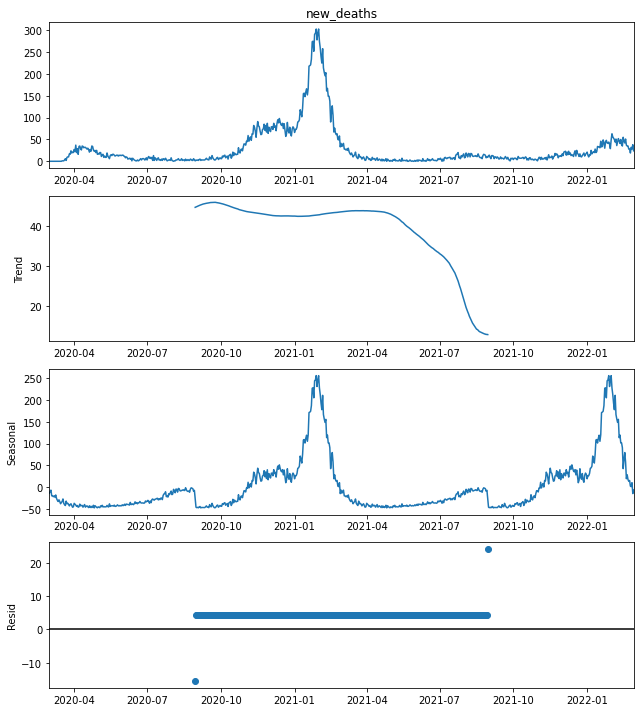

In [3]:
#### Seasonal Decompose ####
series = pd.Series(covid_data_w_weekends['new_deaths'])
result=seasonal_decompose(series, model='additive', period=365)
rcParams['figure.figsize'] = 9,10
figure = result.plot()

In [4]:
# Temperature Data
temperature = pd.read_csv('C:/Users/Alexandre Arriaga/Desktop/Mestrado/Tese/Dados/Temperaturas Diárias CSV.csv',index_col = False,  sep=',',engine='python')
temperature = temperature[['DATE','TAVG']]
temperature.rename(columns = {'DATE': 'Date','TAVG':'temperature'}, inplace = True)
temperature.drop(temperature.loc[temperature['Date'] >= '2022-03-01'].index, inplace=True)
temperature.drop(temperature.loc[temperature['Date'] < '2020-03-02'].index, inplace=True)
temperature = temperature.reset_index()
temperature = temperature.drop(columns='index')
temperature.set_index('Date', inplace=True)
temperature.index = pd.to_datetime(temperature.index)
temperature['temperature'] = temperature['temperature']/10
temperature['temperature_lag7d'] = temperature['temperature'].shift(7)
temperature['temperature_lag14d'] = temperature['temperature'].shift(14)
temperature['temperature_lag21d'] = temperature['temperature'].shift(21)

################
### Drop Weekends
################ 
temperature = temperature.reset_index()
temperature['Day Of Week']= temperature['Date'].dt.dayofweek
temperature.drop(temperature.index[temperature['Day Of Week'] == 5], inplace=True)
temperature.drop(temperature.index[temperature['Day Of Week'] == 6], inplace=True)
temperature.set_index('Date', inplace=True)
temperature = temperature.drop(columns=['Day Of Week'])

################
### Lags
################
temperature_0d = temperature[['temperature']]
temperature_7d = temperature[['temperature_lag7d']]
temperature_14d = temperature[['temperature_lag14d']]
temperature_21d = temperature[['temperature_lag21d']]

display(temperature_0d)
display(temperature_7d)
display(temperature_14d)
display(temperature_21d)

,temperature
Date,
2020-03-02,14.8
2020-03-03,15.3
2020-03-04,16.3
2020-03-05,14.8
2020-03-06,13.7
...,...
2022-02-22,16.7
2022-02-23,16.1
2022-02-24,13.7


,temperature_lag7d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,11.8
2022-02-23,13.3
2022-02-24,14.4


,temperature_lag14d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,14.7
2022-02-23,13.8
2022-02-24,13.3


,temperature_lag21d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,13.4
2022-02-23,12.8
2022-02-24,12.1


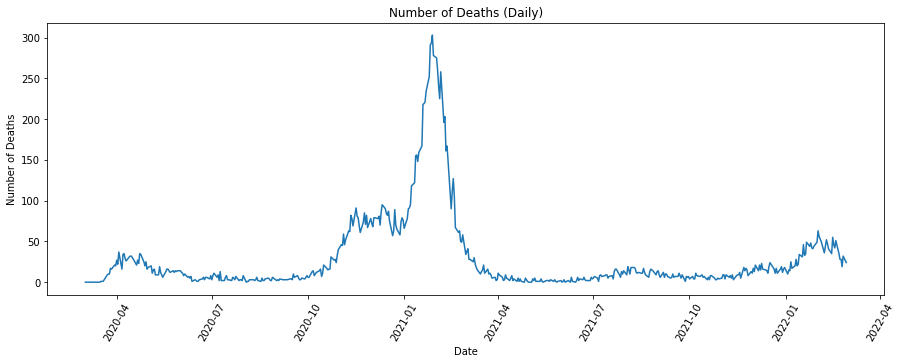

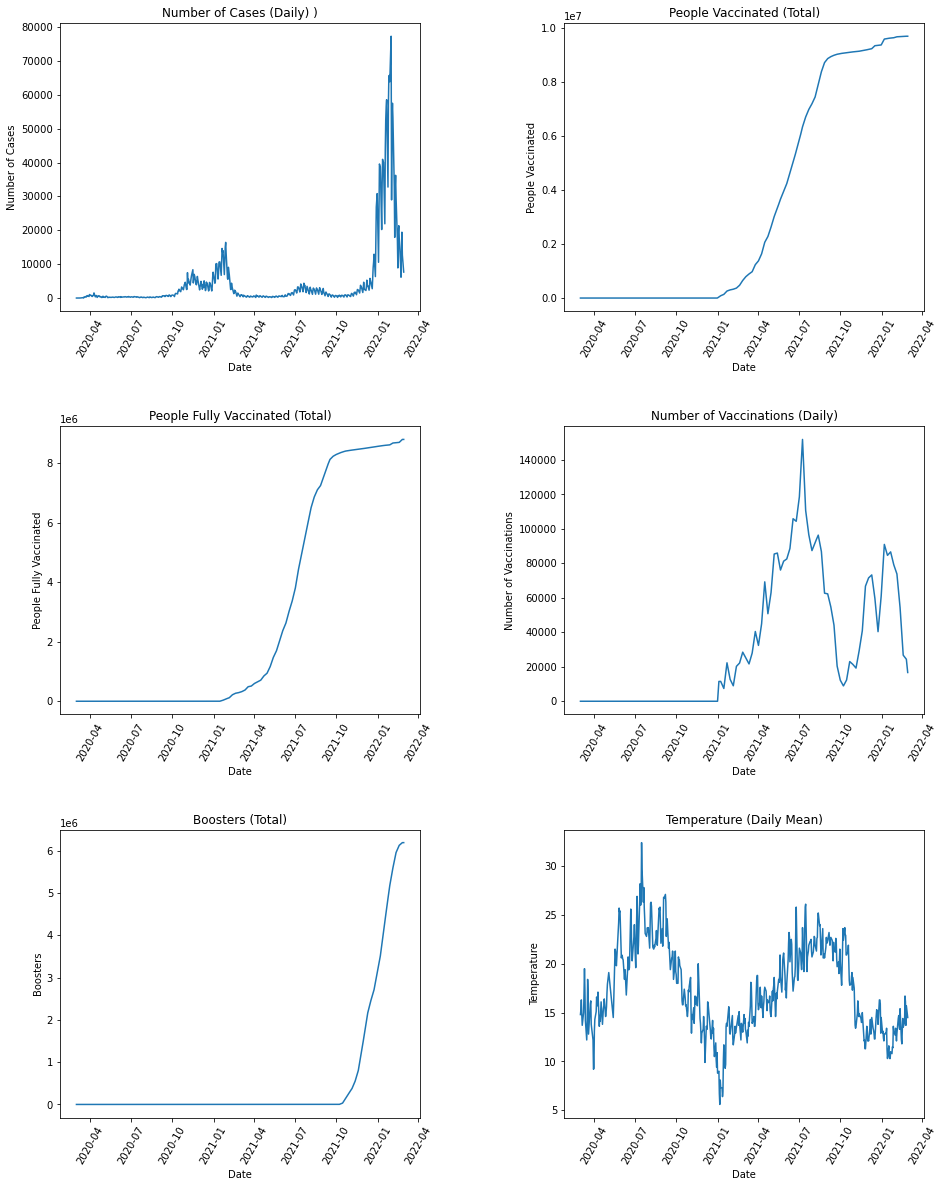

In [5]:
#Plotting Variables

################
### Number of Deaths
################ 
fig, ax1 = plt.subplots(nrows=1, ncols = 1, figsize=(15,5)) 
ax1.plot(covid_data['new_deaths'])
ax1.set_title('Number of Deaths (Daily)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Deaths')

################
### Independent Variables
################ 

fig, [[ax2,ax3],[ax4,ax5],[ax6,ax7]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))  
# Covid
ax2.plot(covid_data['new_cases'])
ax2.set_title('Number of Cases (Daily) )')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Cases')
ax3.plot(covid_data['people_vaccinated'])
ax3.set_title('People Vaccinated (Total)')
ax3.set_xlabel('Date')
ax3.set_ylabel('People Vaccinated')
ax4.plot(covid_data['people_fully_vaccinated'])
ax4.set_title('People Fully Vaccinated (Total)')
ax4.set_xlabel('Date')
ax4.set_ylabel('People Fully Vaccinated')
ax5.plot(covid_data['new_vaccinations'])
ax5.set_title('Number of Vaccinations (Daily)')
ax5.set_xlabel('Date')
ax5.set_ylabel('Number of Vaccinations')
ax6.plot(covid_data['boosters'])
ax6.set_title('Boosters (Total)')
ax6.set_xlabel('Date')
ax6.set_ylabel('Boosters')

# Temperature
ax7.plot(temperature['temperature'])
ax7.set_title('Temperature (Daily Mean)')
ax7.set_xlabel('Date')
ax7.set_ylabel('Temperature')

################
### Figure parameters
################ 
plt.subplots_adjust(left=0.1,
                    bottom=-1.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1.tick_params(axis='x', rotation=60)
ax2.tick_params(axis='x', rotation=60)
ax3.tick_params(axis='x', rotation=60)
ax4.tick_params(axis='x', rotation=60)
ax5.tick_params(axis='x', rotation=60)
ax6.tick_params(axis='x', rotation=60)
ax7.tick_params(axis='x', rotation=60)

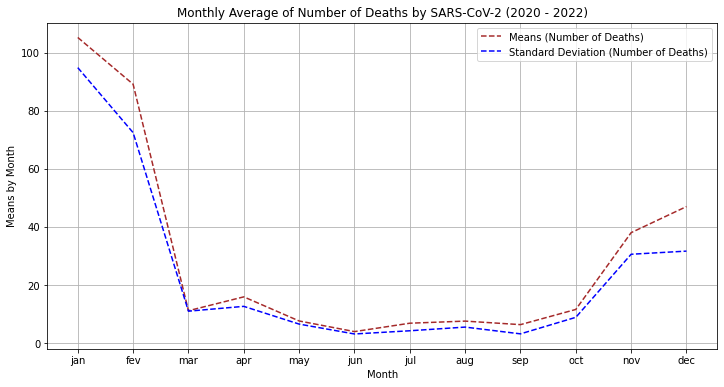

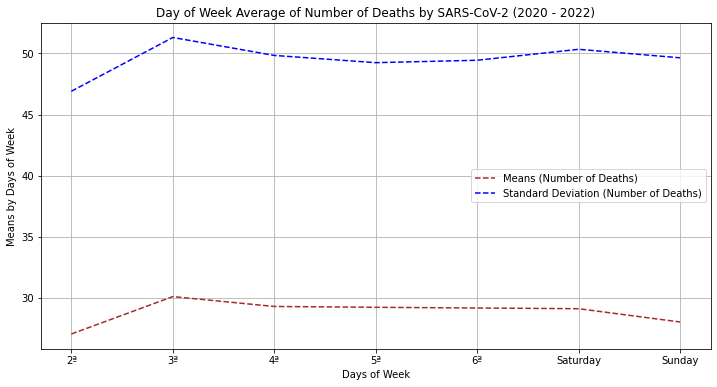

In [6]:
# Ploting Means by Month and Days of Week - PSI-20  #####

################
### Plot Data
################ 
covid_data_means = covid_data_w_weekends

monthly_means = (covid_data_means.groupby([covid_data_means.index.month])
           .mean()
           .rename_axis(index=['month'],)
           .reset_index())
monthly_means_std = (covid_data_means.groupby([covid_data_means.index.month])
           .std()
           .rename_axis(index=['month'],)
           .reset_index())

day_of_week_means = (covid_data_means.groupby([covid_data_means.index.weekday])
           .mean()
           .rename_axis(index=['weekday'],)
           .reset_index())
day_of_week_means_std = (covid_data_means.groupby([covid_data_means.index.weekday])
           .std()
           .rename_axis(index=['weekday'],)
           .reset_index())
day_of_week_means['dayofweek'] = ('2ª','3ª','4ª','5ª','6ª','Saturday','Sunday')
day_of_week_means_std['dayofweek'] = ('2ª','3ª','4ª','5ª','6ª','Saturday','Sunday')

################
### Plot Means by Month
################ 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(monthly_means['month'], monthly_means['new_deaths'], color='brown', linestyle='--', label='Means (Number of Deaths)')
ax.plot(monthly_means_std['month'], monthly_means_std['new_deaths'], color='blue', linestyle='--', label='Standard Deviation (Number of Deaths)')
ax.set_title('Monthly Average of Number of Deaths by SARS-CoV-2 (2020 - 2022)')
ax.set_ylabel('Means by Month')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['jan','fev','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
ax.legend()
ax.grid()

################
### Plot Means by Day of Week
################ 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(day_of_week_means['dayofweek'], day_of_week_means['new_deaths'], color='brown', linestyle='--', label='Means (Number of Deaths)')
ax.plot(day_of_week_means_std['dayofweek'], day_of_week_means_std['new_deaths'], color='blue', linestyle='--', label='Standard Deviation (Number of Deaths)')
ax.set_title('Day of Week Average of Number of Deaths by SARS-CoV-2 (2020 - 2022)')
ax.set_ylabel('Means by Days of Week')
ax.set_xlabel('Days of Week')
ax.legend()
ax.grid()

In [7]:
# Data Treatment (With out lag's)

################
### Concat Data
################ 
data_0d = covid_data_0d
data_0d = pd.concat([data_0d, temperature_0d], axis=1, join="inner")
data_0d = data_0d.iloc[15:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_0d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_0d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_0d)
data_standard = pd.DataFrame(data_standard)
data_0d = data_0d.reset_index()
data_standard['Date'] = data_0d['Date']
data_0d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_0d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_0d = data_standard
data_0d.index = pd.to_datetime(data_0d.index)

display(data_0d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [10556.76454247]            P-Value: [0.]
Not Normal Data

 people_vaccinated 
Test Statistic: [3477.6051754]            P-Value: [0.]
Not Normal Data

 new_cases_before_vaccination 
Test Statistic: [329.41971649]            P-Value: [2.93371181e-72]
Not Normal Data

 new_cases_after_vaccination 
Test Statistic: [414.50281842]            P-Value: [9.81423865e-91]
Not Normal Data

 boosters 
Test Statistic: [284.24736737]            P-Value: [1.89002883e-62]
Not Normal Data

 new_vaccinations 
Test Statistic: [54.47179086]            P-Value: [1.48457077e-12]
Not Normal Data

 temperature 
Test Statistic: [11.47942138]            P-Value: [0.0032157]
Not Normal Data


,new_deaths,people_fully_vaccinated,people_vaccinated,new_cases_before_vaccination,new_cases_after_vaccination,boosters,new_vaccinations,temperature
Date,,,,,,,,
2020-03-23,-0.415890,-0.813192,-0.890403,-0.095618,-0.387154,-0.383639,-0.898671,-0.523610
2020-03-24,-0.394642,-0.813192,-0.890403,-0.208761,-0.387154,-0.383639,-0.898671,-0.368620
2020-03-25,-0.394642,-0.813192,-0.890403,0.028266,-0.387154,-0.383639,-0.898671,-0.302196
2020-03-26,-0.245911,-0.813192,-0.890403,-0.031886,-0.387154,-0.383639,-0.898671,-0.833589
2020-03-27,-0.267158,-0.813192,-0.890403,0.093431,-0.387154,-0.383639,-0.898671,-0.922155
...,...,...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,1.510959,-0.425022,0.166376,3.775070,-0.225412,-0.191489
2022-02-23,-0.012190,1.578990,1.511191,-0.425022,0.900814,3.781262,-0.234353,-0.324338
2022-02-24,-0.203416,1.582869,1.511423,-0.425022,1.363214,3.787454,-0.243320,-0.855730


In [8]:
# Data Treatment (7 day lag's)

################
### Concat Data
################ 
data_7d = covid_data_7d
data_7d = pd.concat([data_7d, temperature_7d], axis=1, join="inner")
data_7d = data_7d.dropna()
data_7d = data_7d.iloc[10:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_7d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_7d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_7d)
data_standard = pd.DataFrame(data_standard)
data_7d = data_7d.reset_index()
data_standard['Date'] = data_7d['Date']
data_7d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_7d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_7d = data_standard
data_7d.index = pd.to_datetime(data_7d.index)

display(data_7d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated_lag7d 
Test Statistic: [1646.80968783]            P-Value: [0.]
Not Normal Data

 people_vaccinated_lag7d 
Test Statistic: [4013.38340691]            P-Value: [0.]
Not Normal Data

 new_cases_before_vaccination_lag7d 
Test Statistic: [329.42150231]            P-Value: [2.93109345e-72]
Not Normal Data

 new_cases_after_vaccination_lag7d 
Test Statistic: [420.82189806]            P-Value: [4.16567999e-92]
Not Normal Data

 boosters_lag7d 
Test Statistic: [304.85004792]            P-Value: [6.34823784e-67]
Not Normal Data

 new_vaccinations_lag7d 
Test Statistic: [55.25247618]            P-Value: [1.00479448e-12]
Not Normal Data

 temperature_lag7d 
Test Statistic: [11.99781205]            P-Value: [0.00248147]
Not Normal Data


,new_deaths,people_fully_vaccinated_lag7d,people_vaccinated_lag7d,new_cases_before_vaccination_lag7d,new_cases_after_vaccination_lag7d,boosters_lag7d,new_vaccinations_lag7d,temperature_lag7d
Date,,,,,,,,
2020-03-23,-0.415890,-0.796923,-0.873129,-0.364790,-0.374715,-0.369365,-0.889780,-1.188171
2020-03-24,-0.394642,-0.796923,-0.873129,-0.342583,-0.374715,-0.369365,-0.889780,-0.790448
2020-03-25,-0.394642,-0.796923,-0.873129,-0.426395,-0.374715,-0.369365,-0.889780,0.181765
2020-03-26,-0.245911,-0.796923,-0.873129,-0.184987,-0.374715,-0.369365,-0.889780,-0.127575
2020-03-27,-0.267158,-0.796923,-0.873129,-0.258054,-0.374715,-0.369365,-0.889780,-1.055597
...,...,...,...,...,...,...,...,...
2022-02-22,-0.012190,1.598027,1.545739,-0.426395,0.428239,4.048533,0.130215,-1.276554
2022-02-23,-0.012190,1.598433,1.545979,-0.426395,1.381160,4.066232,0.025777,-0.945118
2022-02-24,-0.203416,1.598839,1.546219,-0.426395,1.554525,4.083931,-0.078686,-0.702065


In [9]:
# Data Treatment (14 day lag's)

################
### Concat Data
################ 
data_14d = covid_data_14d
data_14d = pd.concat([data_14d, temperature_14d], axis=1, join="inner")
data_14d = data_14d.dropna()
data_14d = data_14d.iloc[5:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_14d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_14d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_14d)
data_standard = pd.DataFrame(data_standard)
data_14d = data_14d.reset_index()
data_standard['Date'] = data_14d['Date']
data_14d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_14d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_14d = data_standard
data_14d.index = pd.to_datetime(data_14d.index)

display(data_14d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated_lag14d 
Test Statistic: [631.92576467]            P-Value: [6.01261943e-138]
Not Normal Data

 people_vaccinated_lag14d 
Test Statistic: [5142.74744739]            P-Value: [0.]
Not Normal Data

 new_cases_before_vaccination_lag14d 
Test Statistic: [329.52103944]            P-Value: [2.78878768e-72]
Not Normal Data

 new_cases_after_vaccination_lag14d 
Test Statistic: [431.54557819]            P-Value: [1.95464706e-94]
Not Normal Data

 boosters_lag14d 
Test Statistic: [324.32154662]            P-Value: [3.75379862e-71]
Not Normal Data

 new_vaccinations_lag14d 
Test Statistic: [56.33303585]            P-Value: [5.85378397e-13]
Not Normal Data

 temperature_lag14d 
Test Statistic: [11.29796009]            P-Value: [0.00352111]
Not Normal Data


,new_deaths,people_fully_vaccinated_lag14d,people_vaccinated_lag14d,new_cases_before_vaccination_lag14d,new_cases_after_vaccination_lag14d,boosters_lag14d,new_vaccinations_lag14d,temperature_lag14d
Date,,,,,,,,
2020-03-23,-0.415890,-0.780712,-0.856205,-0.425998,-0.360677,-0.355871,-0.877775,-0.574923
2020-03-24,-0.394642,-0.780712,-0.856205,-0.418118,-0.360677,-0.355871,-0.877775,-0.132331
2020-03-25,-0.394642,-0.780712,-0.856205,-0.413104,-0.360677,-0.355871,-0.877775,0.420910
2020-03-26,-0.245911,-0.780712,-0.856205,-0.425998,-0.360677,-0.355871,-0.877775,-0.065942
2020-03-27,-0.267158,-0.780712,-0.856205,-0.388032,-0.360677,-0.355871,-0.877775,-0.751960
...,...,...,...,...,...,...,...,...
2022-02-22,-0.012190,1.635901,1.581961,-0.425998,1.269531,4.289082,0.774138,-0.641312
2022-02-23,-0.012190,1.636319,1.582239,-0.425998,2.629660,4.330483,0.700874,-0.840478
2022-02-24,-0.203416,1.636738,1.582517,-0.425998,2.937332,4.371885,0.627610,-0.951126


In [10]:
# Data Treatment (21 day lag's)

################
### Concat Data
################ 
data_21d = covid_data_21d
data_21d = pd.concat([data_21d, temperature_21d], axis=1, join="inner")
data_21d = data_21d.dropna()

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_21d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_21d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_21d)
data_standard = pd.DataFrame(data_standard)
data_21d = data_21d.reset_index()
data_standard['Date'] = data_21d['Date']
data_21d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_21d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_21d = data_standard
data_21d.index = pd.to_datetime(data_21d.index)

display(data_21d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated_lag21d 
Test Statistic: [350.52339537]            P-Value: [7.67029039e-77]
Not Normal Data

 people_vaccinated_lag21d 
Test Statistic: [10614.93214241]            P-Value: [0.]
Not Normal Data

 new_cases_before_vaccination_lag21d 
Test Statistic: [329.92183223]            P-Value: [2.28236134e-72]
Not Normal Data

 new_cases_after_vaccination_lag21d 
Test Statistic: [453.49076761]            P-Value: [3.35529738e-99]
Not Normal Data

 boosters_lag21d 
Test Statistic: [341.68740616]            P-Value: [6.36095735e-75]
Not Normal Data

 new_vaccinations_lag21d 
Test Statistic: [56.94576857]            P-Value: [4.30906923e-13]
Not Normal Data

 temperature_lag21d 
Test Statistic: [10.2436883]            P-Value: [0.00596501]
Not Normal Data


,new_deaths,people_fully_vaccinated_lag21d,people_vaccinated_lag21d,new_cases_before_vaccination_lag21d,new_cases_after_vaccination_lag21d,boosters_lag21d,new_vaccinations_lag21d,temperature_lag21d
Date,,,,,,,,
2020-03-23,-0.415890,-0.764668,-0.839603,-0.422655,-0.345388,-0.343248,-0.861120,-0.623724
2020-03-24,-0.394642,-0.764668,-0.839603,-0.424087,-0.345388,-0.343248,-0.861120,-0.512824
2020-03-25,-0.394642,-0.764668,-0.839603,-0.421938,-0.345388,-0.343248,-0.861120,-0.291026
2020-03-26,-0.245911,-0.764668,-0.839603,-0.421938,-0.345388,-0.343248,-0.861120,-0.623724
2020-03-27,-0.267158,-0.764668,-0.839603,-0.420506,-0.345388,-0.343248,-0.861120,-0.867702
...,...,...,...,...,...,...,...,...
2022-02-22,-0.012190,1.669295,1.616822,-0.424087,2.354988,4.486899,1.140192,-0.934241
2022-02-23,-0.012190,1.671794,1.618076,-0.424087,4.660341,4.540399,1.120138,-1.067320
2022-02-24,-0.203416,1.674293,1.619329,-0.424087,5.014630,4.593900,1.100083,-1.222579


,new_deaths,people_fully_vaccinated,people_vaccinated,new_cases_before_vaccination,new_cases_after_vaccination,boosters,new_vaccinations,temperature
new_deaths,1.000000,-0.209947,-0.236113,0.233393,0.195388,0.027653,-0.210484,-0.475147
people_fully_vaccinated,-0.209947,1.000000,0.990081,-0.345624,0.449404,0.590619,0.543545,-0.071021
people_vaccinated,-0.236113,0.990081,1.000000,-0.378440,0.436730,0.566366,0.642238,-0.052317
new_cases_before_vaccination,0.233393,-0.345624,-0.378440,1.000000,-0.164549,-0.163055,-0.381955,-0.194608
new_cases_after_vaccination,0.195388,0.449404,0.436730,-0.164549,1.000000,0.783127,0.321099,-0.361886
boosters,0.027653,0.590619,0.566366,-0.163055,0.783127,1.000000,0.265995,-0.360261
new_vaccinations,-0.210484,0.543545,0.642238,-0.381955,0.321099,0.265995,1.000000,0.009271
temperature,-0.475147,-0.071021,-0.052317,-0.194608,-0.361886,-0.360261,0.009271,1.000000


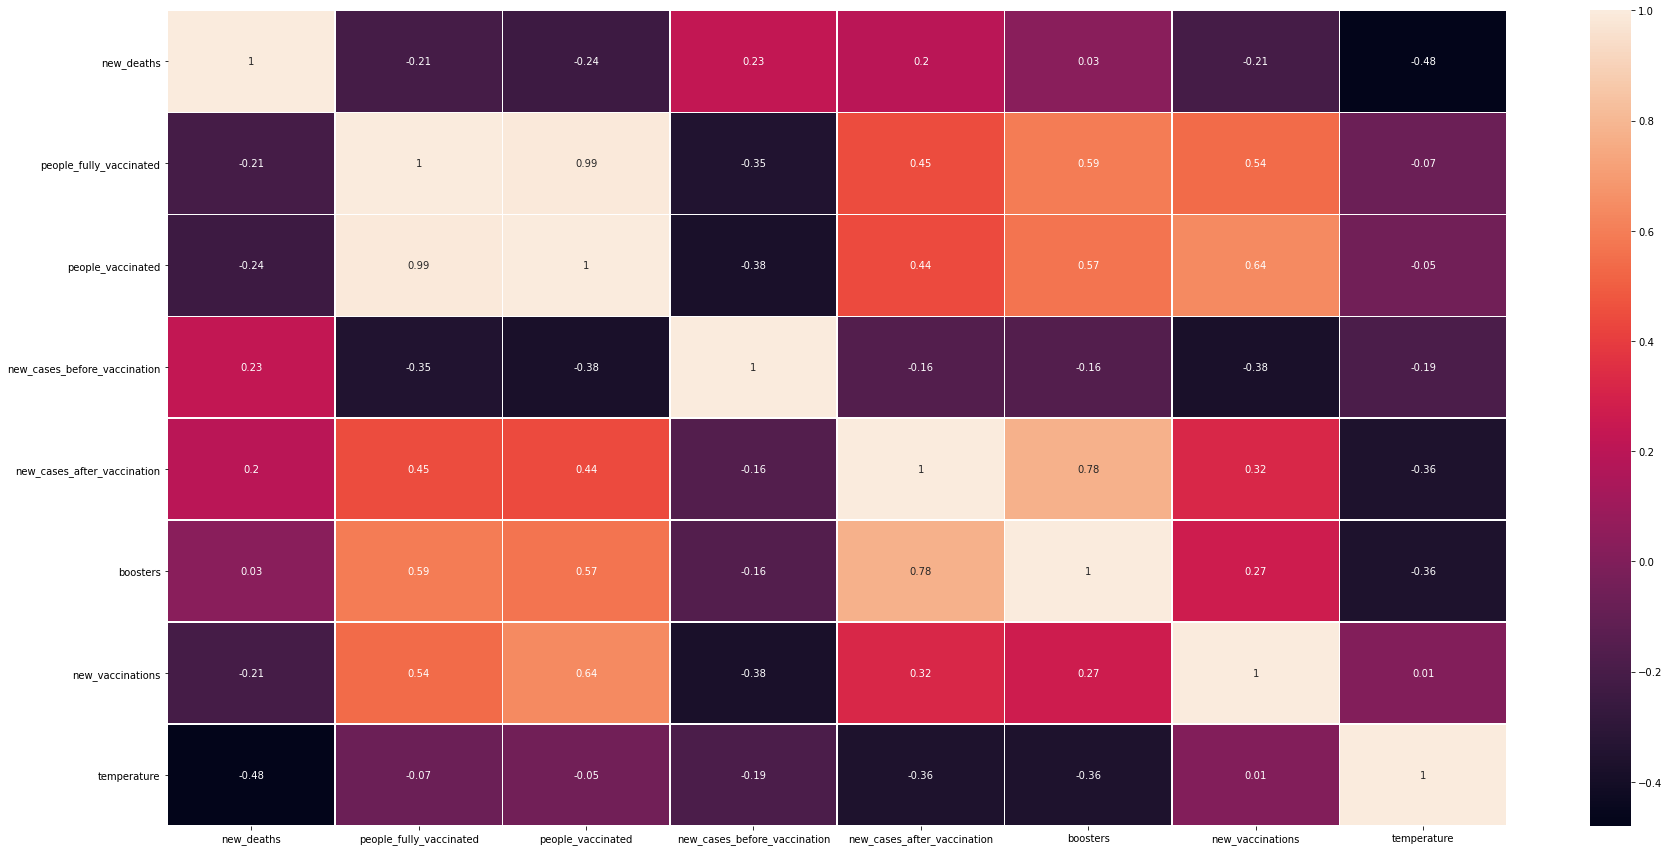

In [11]:
# Data Correlation (With out lag's)

################
### Set correlation DataFrame
################ 
correlation = data_0d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated_lag7d,people_vaccinated_lag7d,new_cases_before_vaccination_lag7d,new_cases_after_vaccination_lag7d,boosters_lag7d,new_vaccinations_lag7d,temperature_lag7d
new_deaths,1.000000,-0.203697,-0.231321,0.274952,0.212648,0.032486,-0.206958,-0.505888
people_fully_vaccinated_lag7d,-0.203697,1.000000,0.989897,-0.339804,0.449054,0.581255,0.558502,-0.061893
people_vaccinated_lag7d,-0.231321,0.989897,1.000000,-0.372298,0.436292,0.557038,0.657125,-0.043007
new_cases_before_vaccination_lag7d,0.274952,-0.339804,-0.372298,1.000000,-0.159777,-0.157495,-0.379398,-0.196143
new_cases_after_vaccination_lag7d,0.212648,0.449054,0.436292,-0.159777,1.000000,0.822919,0.327633,-0.352304
boosters_lag7d,0.032486,0.581255,0.557038,-0.157495,0.822919,1.000000,0.301673,-0.367447
new_vaccinations_lag7d,-0.206958,0.558502,0.657125,-0.379398,0.327633,0.301673,1.000000,0.009299
temperature_lag7d,-0.505888,-0.061893,-0.043007,-0.196143,-0.352304,-0.367447,0.009299,1.000000


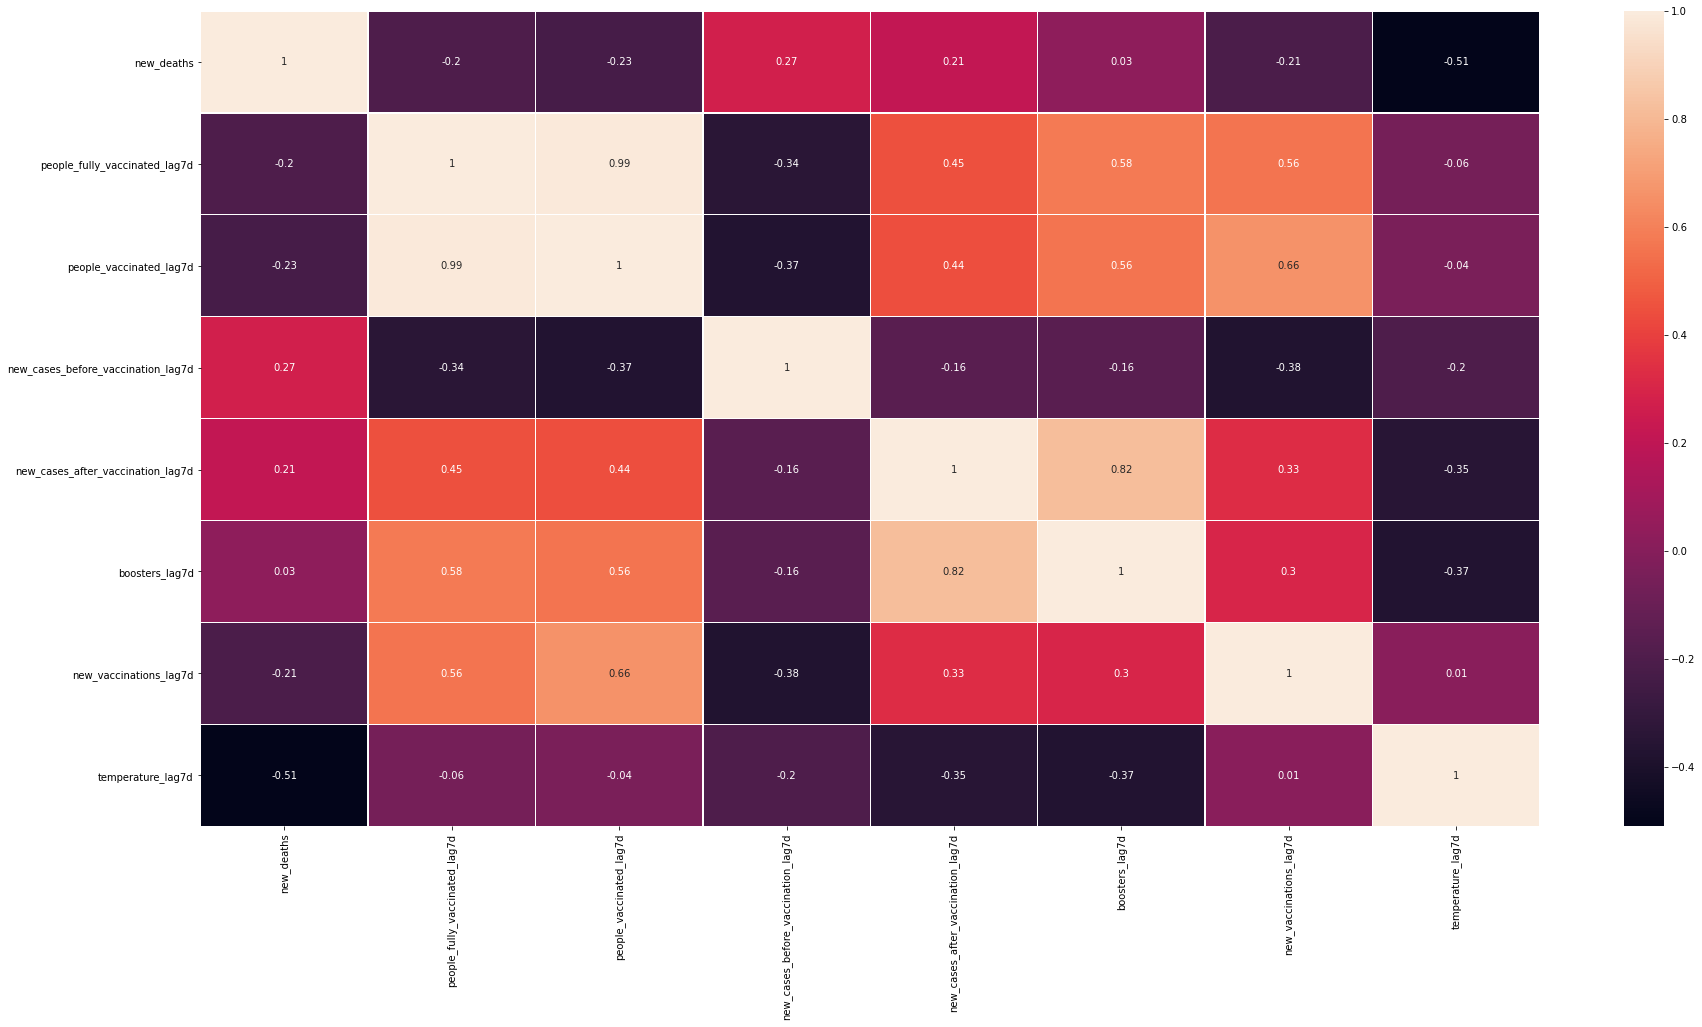

In [12]:
# Data Correlation (7 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_7d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated_lag14d,people_vaccinated_lag14d,new_cases_before_vaccination_lag14d,new_cases_after_vaccination_lag14d,boosters_lag14d,new_vaccinations_lag14d,temperature_lag14d
new_deaths,1.000000,-0.196948,-0.226396,0.346584,0.195227,0.036038,-0.211528,-0.556876
people_fully_vaccinated_lag14d,-0.196948,1.000000,0.989692,-0.332581,0.444964,0.573069,0.570098,-0.043699
people_vaccinated_lag14d,-0.226396,0.989692,1.000000,-0.364741,0.432246,0.548200,0.668965,-0.024865
new_cases_before_vaccination_lag14d,0.346584,-0.332581,-0.364741,1.000000,-0.153647,-0.151600,-0.373930,-0.198403
new_cases_after_vaccination_lag14d,0.195227,0.444964,0.432246,-0.153647,1.000000,0.864639,0.334148,-0.346506
boosters_lag14d,0.036038,0.573069,0.548200,-0.151600,0.864639,1.000000,0.335806,-0.359778
new_vaccinations_lag14d,-0.211528,0.570098,0.668965,-0.373930,0.334148,0.335806,1.000000,0.012059
temperature_lag14d,-0.556876,-0.043699,-0.024865,-0.198403,-0.346506,-0.359778,0.012059,1.000000


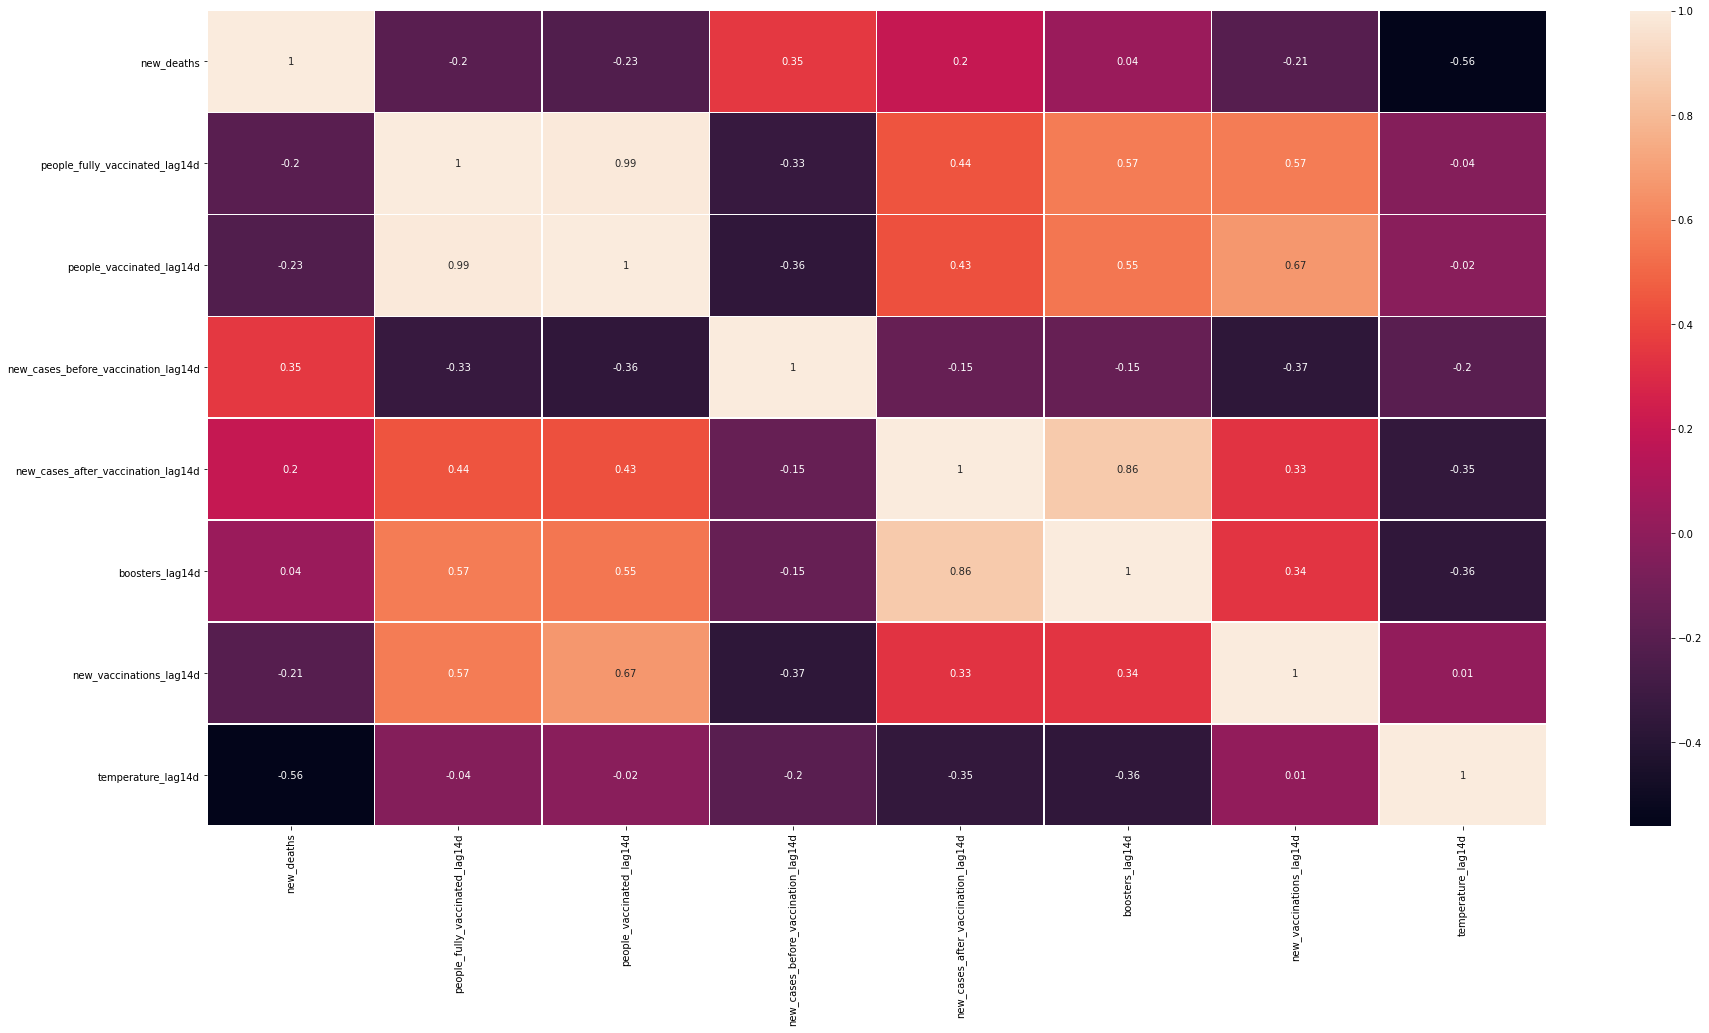

In [13]:
# Data Correlation (14 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_14d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated_lag21d,people_vaccinated_lag21d,new_cases_before_vaccination_lag21d,new_cases_after_vaccination_lag21d,boosters_lag21d,new_vaccinations_lag21d,temperature_lag21d
new_deaths,1.000000,-0.189714,-0.221165,0.445077,0.161917,0.039249,-0.223953,-0.559779
people_fully_vaccinated_lag21d,-0.189714,1.000000,0.989470,-0.324286,0.426677,0.565832,0.572349,-0.026379
people_vaccinated_lag21d,-0.221165,0.989470,1.000000,-0.356065,0.414336,0.539996,0.672066,-0.007426
new_cases_before_vaccination_lag21d,0.445077,-0.324286,-0.356065,1.000000,-0.146475,-0.145567,-0.365190,-0.198845
new_cases_after_vaccination_lag21d,0.161917,0.426677,0.414336,-0.146475,1.000000,0.881873,0.330307,-0.338134
boosters_lag21d,0.039249,0.565832,0.539996,-0.145567,0.881873,1.000000,0.347858,-0.358839
new_vaccinations_lag21d,-0.223953,0.572349,0.672066,-0.365190,0.330307,0.347858,1.000000,0.021690
temperature_lag21d,-0.559779,-0.026379,-0.007426,-0.198845,-0.338134,-0.358839,0.021690,1.000000


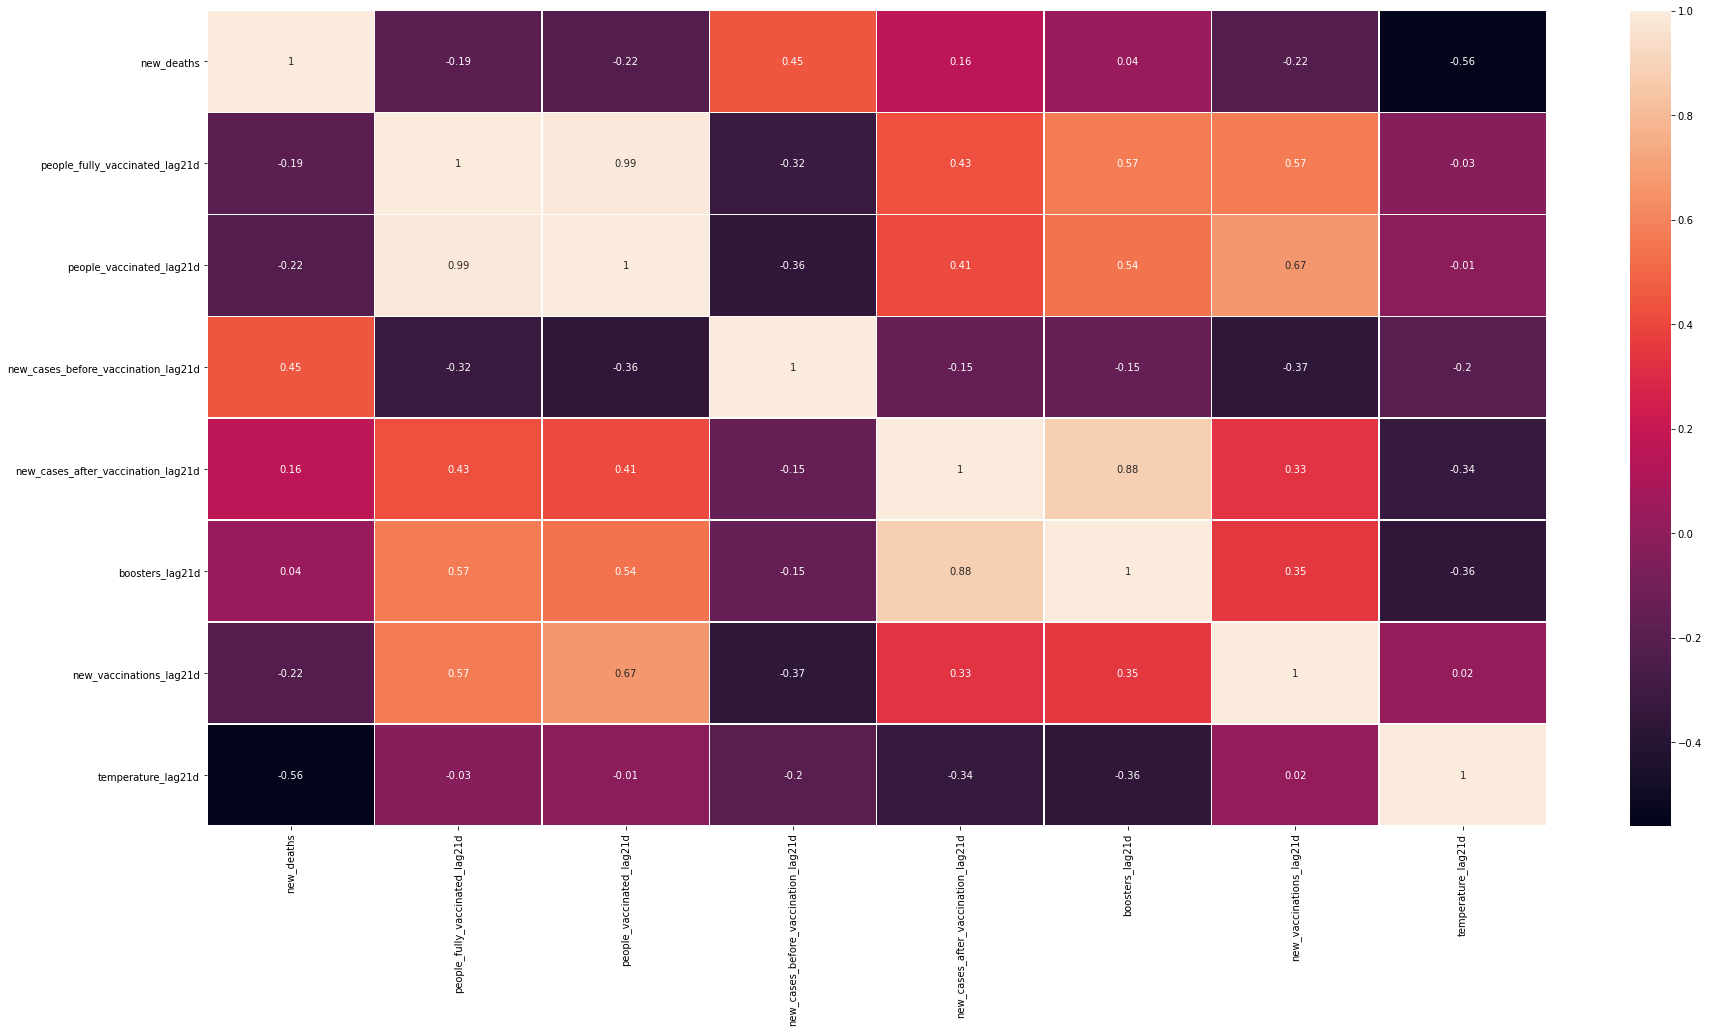

In [14]:
# Data Correlation (21 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_21d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [15]:
# Variables Choice

# Os Boosters seja sem lag ou com qualquer um dos lag's tem uma correlação perto de 0 com o número de mortes, 
    #portanto a variável vai ser removida
    
# Após verificar as correlações escolheu-se o lag de cada variável mais correlacionado com o número de mortes:
data = data_0d[['new_deaths','people_fully_vaccinated','people_vaccinated']]
data = pd.concat([data, data_7d[['new_cases_after_vaccination_lag7d']]], axis=1, join="inner")
data = pd.concat([data, data_21d[['new_cases_before_vaccination_lag21d','new_vaccinations_lag21d','temperature_lag21d']]], axis=1, join="inner")
display(data)

,new_deaths,people_fully_vaccinated,people_vaccinated,new_cases_after_vaccination_lag7d,new_cases_before_vaccination_lag21d,new_vaccinations_lag21d,temperature_lag21d
Date,,,,,,,
2020-03-23,-0.415890,-0.813192,-0.890403,-0.374715,-0.422655,-0.861120,-0.623724
2020-03-24,-0.394642,-0.813192,-0.890403,-0.374715,-0.424087,-0.861120,-0.512824
2020-03-25,-0.394642,-0.813192,-0.890403,-0.374715,-0.421938,-0.861120,-0.291026
2020-03-26,-0.245911,-0.813192,-0.890403,-0.374715,-0.421938,-0.861120,-0.623724
2020-03-27,-0.267158,-0.813192,-0.890403,-0.374715,-0.420506,-0.861120,-0.867702
...,...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,1.510959,0.428239,-0.424087,1.140192,-0.934241
2022-02-23,-0.012190,1.578990,1.511191,1.381160,-0.424087,1.120138,-1.067320
2022-02-24,-0.203416,1.582869,1.511423,1.554525,-0.424087,1.100083,-1.222579



Parallel analysis suggests that the number of components : 2

Cumulative Explained Variance of the components: [ 50.77784805  73.4489397   85.2045714   93.42774685  99.94007261
 100.        ] 



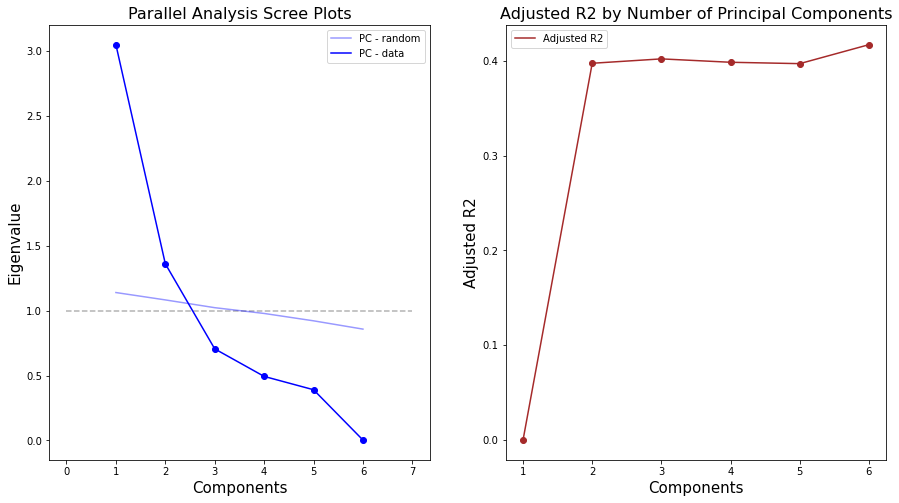

In [16]:
# Parallel Analysis and Adj R2 by number of components

y= data['new_deaths']
x = data.drop('new_deaths', axis=1)
def _ChooseComponents(data,y, K=10, printEigenvalues=False):
    ################
    # Create a random matrix to match the dataset
    ################
    n, m = data.shape
    # Set the factor analysis parameters
    fa = FactorAnalyzer(n_factors=1, method='minres', rotation=None, use_smc=True)
    # Create arrays to store the values
    sumComponentEigens = np.empty(m)
    # Run the fit 'K' times over a random matrix
    for runNum in range(0, K):
        fa.fit(np.random.normal(size=(n, m)))
        sumComponentEigens = sumComponentEigens + fa.get_eigenvalues()[0]
    # Average over the number of runs
    avgComponentEigens = sumComponentEigens / K

    ################
    # Get the eigenvalues for the fit on supplied data
    ################
    fa.fit(data)
    dataEv = fa.get_eigenvalues()
    # Set up a scree plot
    fig, [ax1,ax2] = plt.subplots(nrows=1, ncols = 2, figsize=(15,8))
    ################
    ### Print results
    ################
    if printEigenvalues:
        print('\n\033[1mPrincipal component eigenvalues for random matrix:\033[0m\n', avgComponentEigens)
        print('\n\033[1mPrincipal component eigenvalues for data:\033[0m\n', dataEv[0])
    # Find the suggested stopping points
    suggestedComponents = sum((dataEv[0] - avgComponentEigens) > 0)
    print('\n\033[1mParallel analysis suggests that the number of components :\033[0m', suggestedComponents)

    ################
    ### Plot the eigenvalues against the number of variables
    ################
    # Line for eigenvalue 1
    ax1.plot([0, m+1], [1, 1], 'k--', alpha=0.3)
    # For the random data - Components
    ax1.plot(range(1, m+1), avgComponentEigens, 'b', label='PC - random', alpha=0.4)
    # For the Data - Components
    ax1.scatter(range(1, m+1), dataEv[0], c='b', marker='o')
    ax1.plot(range(1, m+1), dataEv[0], 'b', label='PC - data')
    ax1.set_title('Parallel Analysis Scree Plots', {'fontsize': 16})
    ax1.set_xlabel('Components', {'fontsize': 15})
    ax1.set_ylabel('Eigenvalue', {'fontsize': 15})
    ax1.legend()

    ################
    ### Fit PCA
    ################
    pca = PCA()
    X_reduced = pca.fit_transform(x)
    
    ################
    ### Cross Validation Method
    ################
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=8)
    regr = LinearRegression()

    ################
    ### Adj R2 by number of componentes
    ################
    adjr2 = []
    for i in np.arange(1, len(x.columns)+1):
        score = model_selection.cross_val_score(regr,
                   X_reduced[:,:i], y, cv=cv, scoring='r2').mean()
        adjr2.append(1 - (1-score) * (len(y)-1)/(len(y)-i-1))
    adjr2 = pd.DataFrame(adjr2)
    adjr2['components'] = np.arange(1,len(x.columns)+1)
    adjr2 = adjr2.set_index('components')
    
    ################
    ### Plot cross-validation results 
    ################   
    ax2.scatter(range(1, m+1),adjr2, c='brown', marker='o')
    ax2.plot(range(1, m+1),adjr2, 'brown', label='Adjusted R2')
    ax2.set_title('Adjusted R2 by Number of Principal Components', {'fontsize': 16})
    ax2.set_xlabel('Components', {'fontsize': 15})
    ax2.set_ylabel('Adjusted R2', {'fontsize': 15})
    ax2.legend()
    
    ################
    ### Cumulative Explained Variance of the components 
    ################
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_*100)
    print("\n\033[1mCumulative Explained Variance of the components:\033[0m", explained_variance_ratio, "\n")

_ChooseComponents(x,y)


Loadings


,PC1,PC2
variable,,
people_fully_vaccinated,0.534769,-0.018558
people_vaccinated,0.548491,-0.035415
new_cases_after_vaccination_lag7d,0.326868,0.511577
new_cases_before_vaccination_lag21d,-0.289912,0.400022
new_vaccinations_lag21d,0.470837,-0.085776
temperature_lag21d,-0.024503,-0.754530



Correlation between variables and components


,PC1,PC2
variable,,
people_fully_vaccinated,0.934368,-0.021666
people_vaccinated,0.958344,-0.041346
new_cases_after_vaccination_lag7d,0.571116,0.597258
new_cases_before_vaccination_lag21d,-0.506546,0.467019
new_vaccinations_lag21d,0.822663,-0.100142
temperature_lag21d,-0.042812,-0.880902


      
OLS Model
                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           3.62e-51
Time:                        01:02:36   Log-Likelihood:                -465.81
No. Observations:                 396   AIC:                             937.6
Df Residuals:                     393   BIC:                             949.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.040   

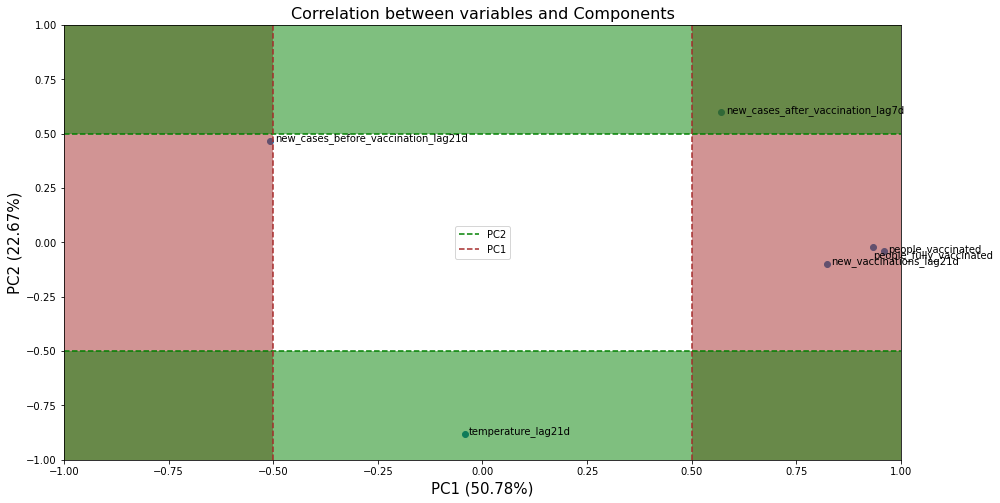

In [17]:
# Principal Component Analysis and Model Validation

################
### Data
################ 
y= data['new_deaths']
x = data.drop('new_deaths', axis=1)

################
### Principal Component Analysis
################ 

# PCA with the number of components selected and loadings
pca = PCA(n_components = 2)
pca.fit(x)
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, pca.components_)))
loadings['variable'] = x.columns.values
loadings = loadings.set_index('variable')
print("\n\033[1mLoadings\033[0m")
display(loadings)


# Correlation between loadings and components
correlation_loadings_PC = pca.components_.T * np.sqrt(pca.explained_variance_)
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
correlation_loadings = pd.DataFrame.from_dict(dict(zip(pc_list,correlation_loadings_PC.T)))
correlation_loadings['variable'] = x.columns.values
correlation_loadings = correlation_loadings.set_index('variable')
print("\n\033[1mCorrelation between variables and components\033[0m")
display(correlation_loadings)

################
### Model Validation
################

# Split train and test data
x_reduced = pd.DataFrame(pca.transform(x),columns = loadings.columns).set_index(x.index)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x_reduced, y, test_size = 0.20,random_state=8) 

# Model and Prediction
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))

# Adj R2 Score
r2 = skl.r2_score(Y_test, Y_test_pred_ols)
adj_r2 = 1 - (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("\n\033[1mAdj R2 Score:\033[0m")
print("R2 Score:" , adj_r2)

################
### Plot Correlations of variables with the components
################ 
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(correlation_loadings[['PC1']],correlation_loadings[['PC2']])
ax.set_title('Correlation between variables and Components',{'fontsize': 16})
ax.set_xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2)) + '%)' ,{'fontsize': 15})
ax.set_ylabel('PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2)) + '%)' ,{'fontsize': 15})
ax.set_xlim(left=-1,right=1)
ax.set_ylim(bottom=-1,top=1)
ax.hlines(y=0.5, xmin=-1, xmax=1, linestyle = 'dashed', color='green',label='PC2')
ax.vlines(x=0.5, ymin=-1, ymax=1, linestyle = 'dashed', color='brown',label ='PC1')
ax.hlines(y=-0.5, xmin=-1, xmax=1, linestyle = 'dashed', color='green')
ax.vlines(x=-0.5, ymin=-1, ymax=1, linestyle = 'dashed', color='brown')
ax.axvspan(-1, -0.5, facecolor='brown', alpha=0.5)
ax.axvspan(0.5, 1, facecolor='brown', alpha=0.5)
ax.axhspan(0.5, 1, facecolor='green', alpha=0.5)
ax.axhspan(-1, -0.5, facecolor='green', alpha=0.5)
ax.legend()
variables = correlation_loadings.index.to_list()
pc1 = correlation_loadings['PC1'].to_list()
pc2 = correlation_loadings['PC2'].to_list()
for i, txt in enumerate(variables):
    if txt == 'people_fully_vaccinated':
        ax.annotate(txt, (pc1[i], pc2[i]-0.05))
    else:
        ax.annotate(txt, (pc1[i]+0.01, pc2[i]))

      
OLS Model
                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           3.62e-51
Time:                        01:04:20   Log-Likelihood:                -465.81
No. Observations:                 396   AIC:                             937.6
Df Residuals:                     393   BIC:                             949.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.040   

,Date,Residuals,mean
0,2020-09-23,-0.116682,-0.087891
1,2021-02-18,1.168054,-0.087891
2,2020-08-14,-0.179150,-0.087891
3,2021-05-20,-0.616950,-0.087891
4,2020-04-02,-0.234188,-0.087891
...,...,...,...
94,2020-08-07,0.455789,-0.087891
95,2020-11-18,0.228507,-0.087891
96,2020-06-02,-0.026110,-0.087891
97,2020-03-30,-0.469232,-0.087891


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: 1.8576806020100718


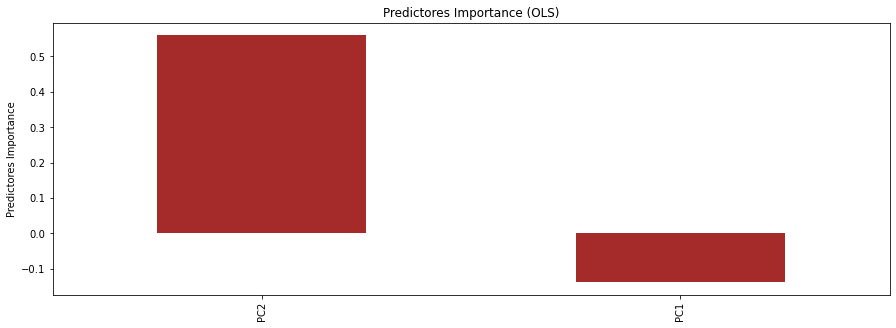

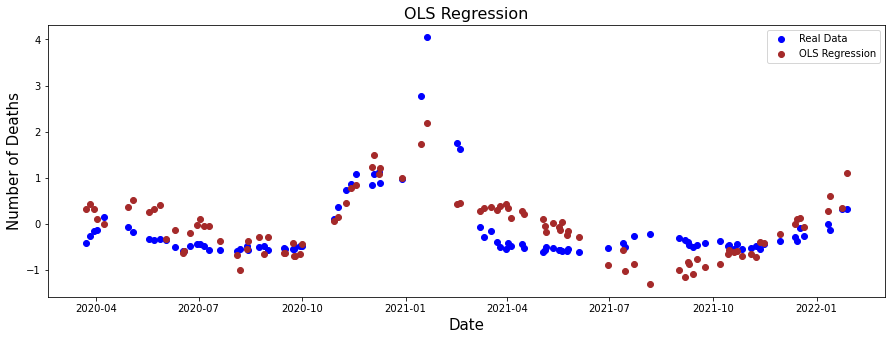

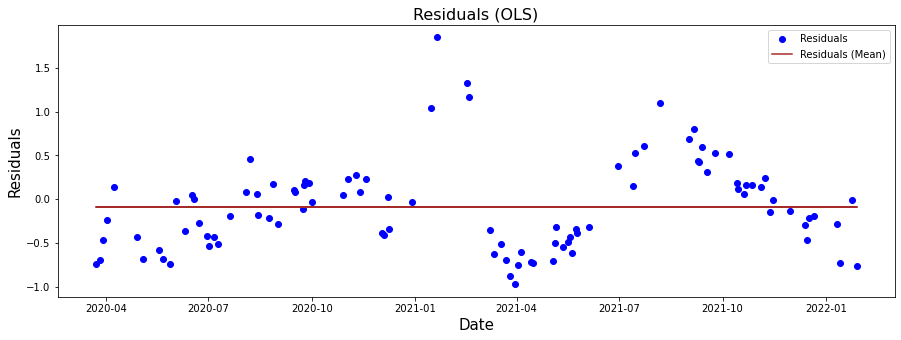

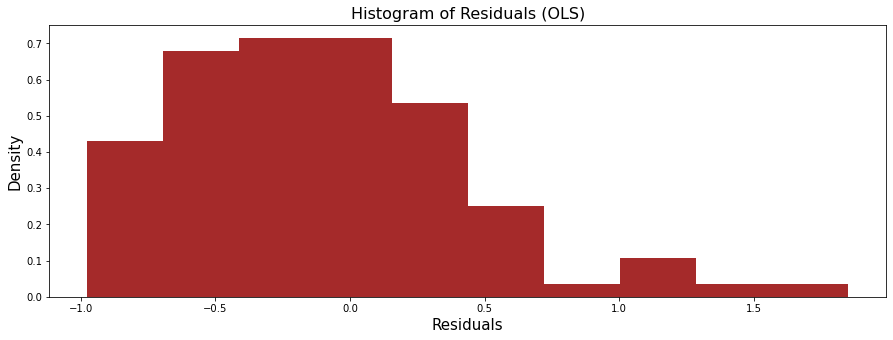

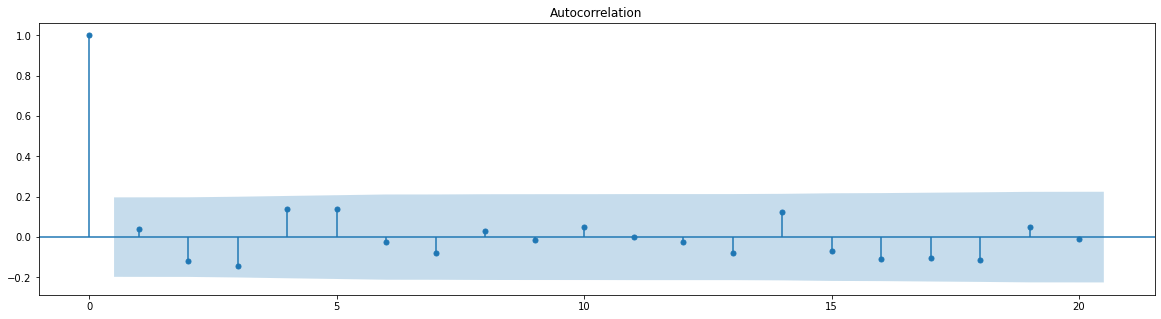

In [18]:
# OLS Regression

################
### Fit Model
################ 
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())

################
### Prediction
################ 
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))
predictors_ols=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_ols= pd.Series(model_ols.params, predictors_ols).sort_values(ascending=False)
pred_importance_ols.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (OLS)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o', c='brown', label="OLS Regression")
ax.set_title('OLS Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_ols_df = pd.DataFrame(Y_test.values - Y_test_pred_ols.values)
residuals_ols_df.rename(columns = {0:'Residuals'}, inplace = True)
residuals_ols_df.index = Y_test.index
residuals_ols_df = residuals_ols_df.reset_index()
residuals_ols_df['mean'] = residuals_ols_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_ols_df)

# PLotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_ols_df['Date'],residuals_ols_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_ols_df['Date'],residuals_ols_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_ols_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_ols_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_ols.values))




Optimal Alpha (Ridge): 0.01
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Ridge Model


,PC1,PC2
Coefficients,,
Coefficients,-0.137609,0.559900


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.116692,-0.087894
1,2021-02-18,1.168060,-0.087894
2,2020-08-14,-0.179159,-0.087894
3,2021-05-20,-0.616950,-0.087894
4,2020-04-02,-0.234189,-0.087894
...,...,...,...
94,2020-08-07,0.455768,-0.087894
95,2020-11-18,0.228519,-0.087894
96,2020-06-02,-0.026119,-0.087894
97,2020-03-30,-0.469229,-0.087894


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.85767564]


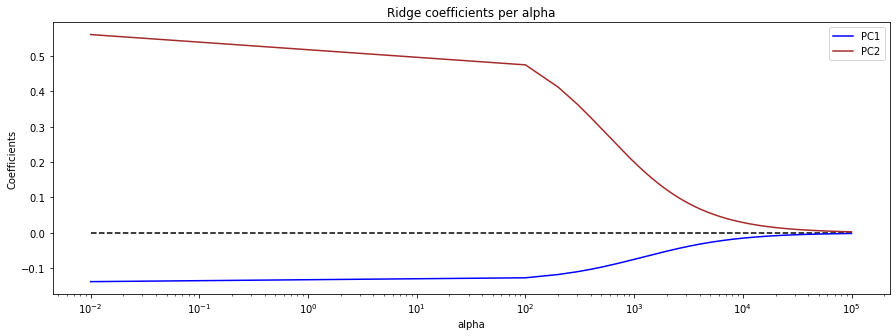

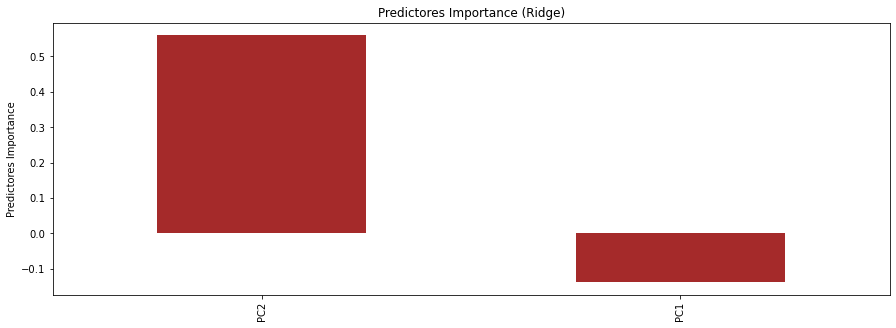

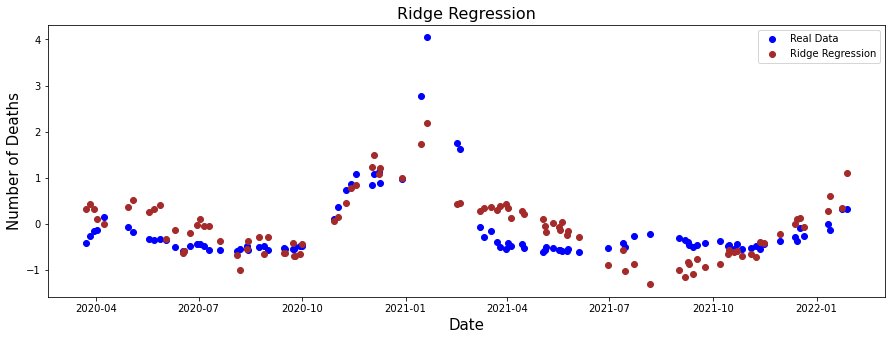

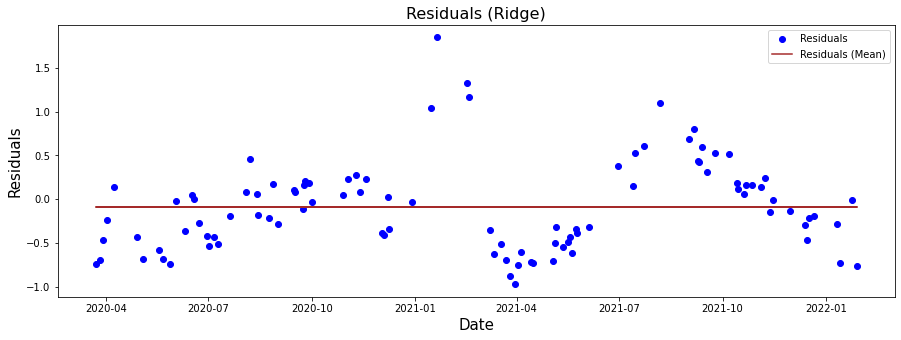

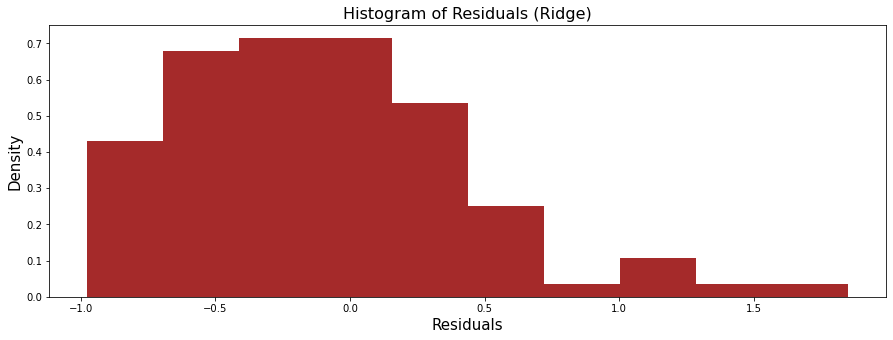

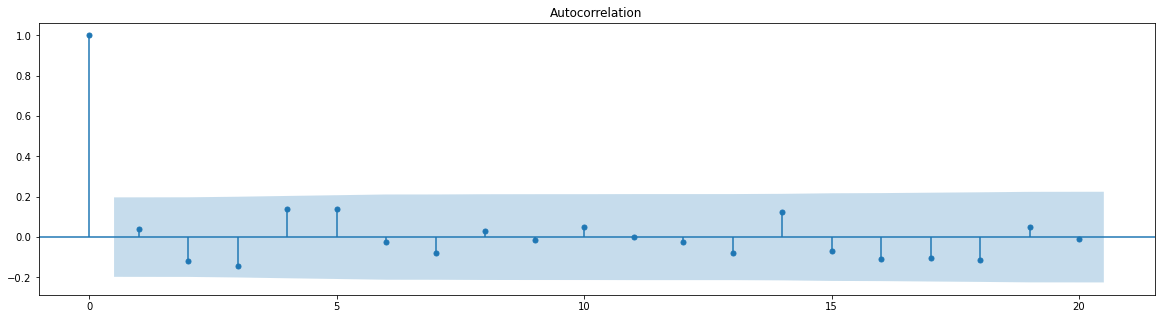

In [19]:
# Ridge Regression

################
### Optimal Parameters
################ 
alphas_Ridge = np.linspace(0.01,100000,1000)
model_alpha_Ridge = Ridge(max_iter=10000)
coefs_alpha_Ridge = []

for i in alphas_Ridge:
    model_alpha_Ridge.set_params(alpha=i)
    model_alpha_Ridge.fit(X_train, Y_train)
    coefs_alpha_Ridge.append(model_alpha_Ridge.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Ridge,[item[0] for item in coefs_alpha_Ridge],label='PC1',color='blue')
ax.plot(alphas_Ridge,[item[1] for item in coefs_alpha_Ridge],label='PC2',color='brown')
ax.hlines(y=0, xmin=0.01, xmax=100000, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Ridge coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Ridge = RidgeCV(cv=5, alphas = alphas_Ridge)
model_alpha_Ridge.fit(X_train, Y_train)
opt_alpha_Ridge = model_alpha_Ridge.alpha_
print("\n\033[1mOptimal Alpha (Ridge):\033[0m", opt_alpha_Ridge)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Ridge = Ridge(alpha = opt_alpha_Ridge)
model_Ridge_fit = model_Ridge.fit(X_train,Y_train)
coefs_Ridge = []
coefs_Ridge.append(model_Ridge.coef_)
coefs_Ridge_df = pd.DataFrame(coefs_Ridge)
coefs_Ridge_df.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
coefs_Ridge_df['Coefficients'] = 'Coefficients'
coefs_Ridge_df.set_index('Coefficients', inplace = True)
coefs_Ridge_df = coefs_Ridge_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mRidge Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Ridge_df)
    print("-"*120)
    
################
### Prediction
################  
Y_test_pred_Ridge = model_Ridge.predict(X_test)
Y_test_pred_Ridge = pd.DataFrame(Y_test_pred_Ridge)
Y_test_pred_Ridge.rename(columns = {0: 'Ridge Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Ridge['Date'] = Y_test['Date']
Y_test_pred_Ridge.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Ridge=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Ridge= pd.Series(model_Ridge.coef_, predictors_Ridge).sort_values(ascending=False)
pred_importance_Ridge.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Ridge)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o', c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Ridge_df = pd.DataFrame(Y_test.values - Y_test_pred_Ridge.values,columns=Y_test.columns)
residuals_Ridge_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_Ridge_df.index = Y_test.index
residuals_Ridge_df = residuals_Ridge_df.reset_index()
residuals_Ridge_df['mean'] = residuals_Ridge_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Ridge_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Ridge_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Ridge_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Ridge.values))



Optimal Alpha (Lasso): 0.0007827392773793458
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Lasso Model


,PC1,PC2
Coefficients,,
Coefficients,-0.137358,0.559348


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.116981,-0.08798
1,2021-02-18,1.168582,-0.08798
2,2020-08-14,-0.179410,-0.08798
3,2021-05-20,-0.616976,-0.08798
4,2020-04-02,-0.233977,-0.08798
...,...,...,...
94,2020-08-07,0.454917,-0.08798
95,2020-11-18,0.229563,-0.08798
96,2020-06-02,-0.026313,-0.08798
97,2020-03-30,-0.468808,-0.08798


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.85741294]


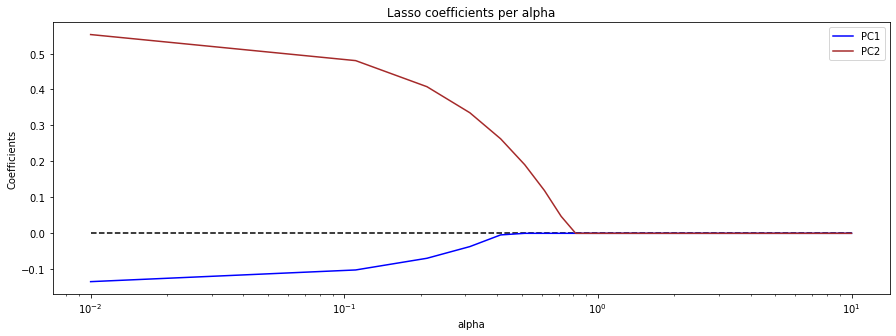

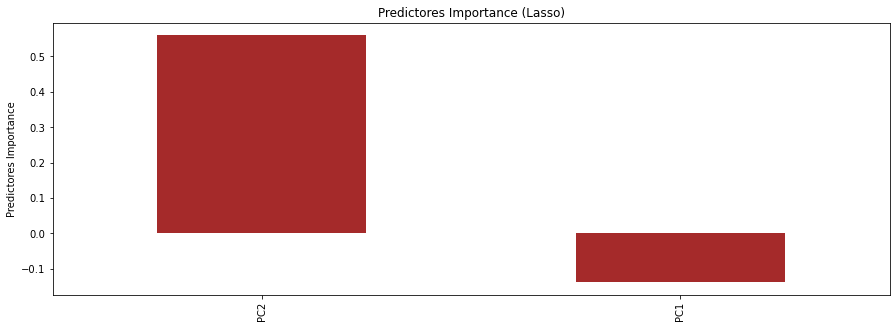

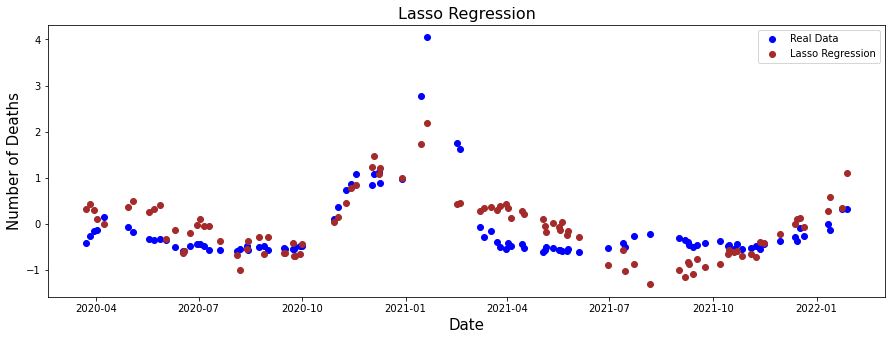

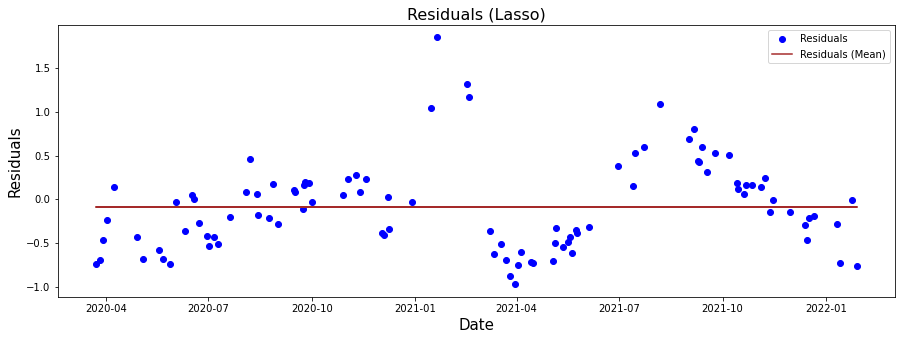

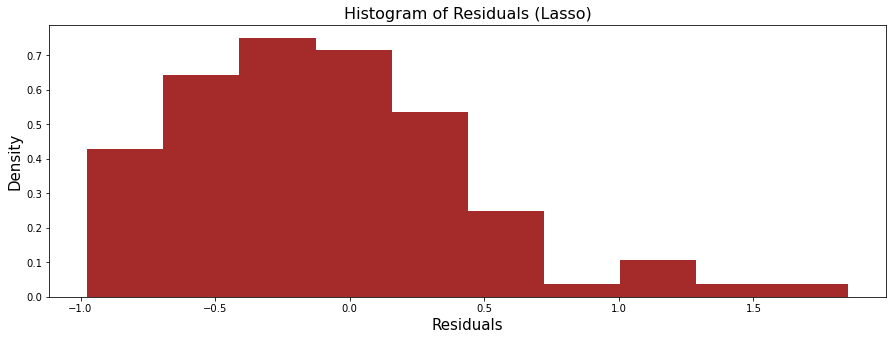

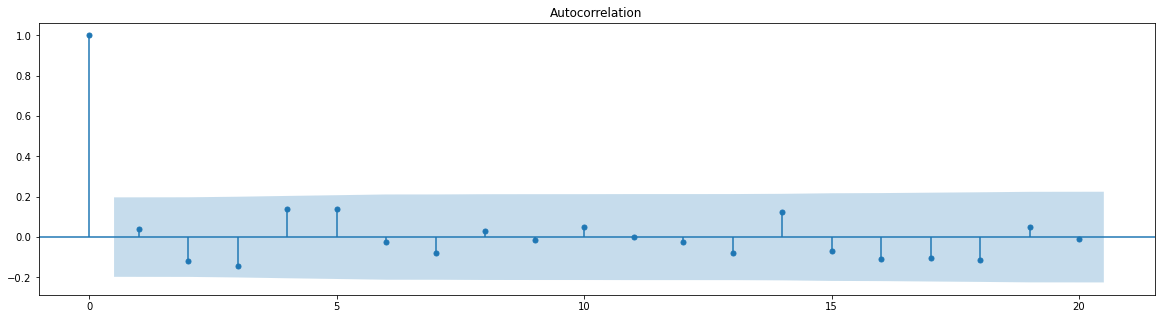

In [20]:
# Lasso Regression

################
### Optimal Alpha
################ 
alphas_Lasso = np.linspace(0.01,10,100)
model_alpha_Lasso = Lasso(max_iter=10000)
coefs_alpha_Lasso = []

for i in alphas_Lasso:
    model_alpha_Lasso.set_params(alpha=i)
    model_alpha_Lasso.fit(X_train, Y_train)
    coefs_alpha_Lasso.append(model_alpha_Lasso.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Lasso,[item[0] for item in coefs_alpha_Lasso],label='PC1',color='blue')
ax.plot(alphas_Lasso,[item[1] for item in coefs_alpha_Lasso],label='PC2',color='brown')
ax.hlines(y=0, xmin=0.01, xmax=10, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Lasso coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Lasso = LassoCV(cv=5, random_state=8, max_iter=10000)
model_alpha_Lasso.fit(X_train, Y_train)
opt_alpha_Lasso = model_alpha_Lasso.alpha_
print("\n\033[1mOptimal Alpha (Lasso):\033[0m", opt_alpha_Lasso)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Lasso = Lasso(alpha = opt_alpha_Lasso)
model_Lasso_fit = model_Lasso.fit(X_train,Y_train)
coefs_Lasso = []
coefs_Lasso.append(model_Lasso.coef_)
coefs_Lasso_df = pd.DataFrame(coefs_Lasso)
coefs_Lasso_df.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
coefs_Lasso_df['Coefficients'] = 'Coefficients'
coefs_Lasso_df.set_index('Coefficients', inplace = True)
coefs_Lasso_df = coefs_Lasso_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mLasso Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Lasso_df)
    print("-"*120)

################
### Prediction
################ 
Y_test_pred_Lasso = model_Lasso.predict(X_test)
Y_test_pred_Lasso = pd.DataFrame(Y_test_pred_Lasso)
Y_test_pred_Lasso.rename(columns = {0: 'Lasso Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Lasso['Date'] = Y_test['Date']
Y_test_pred_Lasso.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Lasso=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Lasso= pd.Series(model_Lasso.coef_, predictors_Lasso).sort_values(ascending=False)
pred_importance_Lasso.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Lasso)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o', c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Lasso_df = pd.DataFrame(Y_test.values - Y_test_pred_Lasso.values,columns=Y_test.columns)
residuals_Lasso_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_Lasso_df.index = Y_test.index
residuals_Lasso_df = residuals_Lasso_df.reset_index()
residuals_Lasso_df['mean'] = residuals_Lasso_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Lasso_df)

#Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Lasso_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals 
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Lasso_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Lasso.values))



In [21]:
# Gradient Boosting - Optimize Parameters

################
### Optimizing Parameters
################

optimize = {'learning_rate': uniform(0.001,0.1),'subsample': uniform(0.1,0.9), 'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}
optimize_GB = RandomizedSearchCV(estimator =GradientBoostingRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_GB.fit(X_train,Y_train)
best_params_GB = pd.DataFrame(optimize_GB.best_params_.items())
best_params_GB= best_params_GB.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_GB_list = []
best_score_GB_list.append(optimize_GB.best_score_)
best_score_GB = pd.DataFrame(best_score_GB_list)
best_score_GB= best_score_GB.rename(columns={0: 'Best Score'})
display(best_params_GB.style.hide_index())
display(best_score_GB.style.hide_index())

################
### Parameters to list
################
learning_rate_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'learning_rate', 'Best Values'].item()
max_depth_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'n_estimators', 'Best Values'].item()
subsample_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'subsample', 'Best Values'].item()
max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_GB.best_estimator_)

Predictors,Best Values
learning_rate,0.083278
max_depth,3.000000
max_features,2.000000
min_samples_leaf,6.000000
min_samples_split,7.000000
n_estimators,554.000000
subsample,0.748610


Best Score
0.847222



Best Estimator:
 GradientBoostingRegressor(learning_rate=0.08327824204975265, max_features=2,
                          min_samples_leaf=6, min_samples_split=7,
                          n_estimators=554, subsample=0.7486102103318397)


      
Gradient Boosting Model (Optimized)


,Coefficients
Predictors,
PC2,0.529153
PC1,0.470847


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.084594,0.024707
1,2021-02-18,1.082353,0.024707
2,2020-08-14,-0.049663,0.024707
3,2021-05-20,-0.059850,0.024707
4,2020-04-02,0.122389,0.024707
...,...,...,...
94,2020-08-07,-0.074924,0.024707
95,2020-11-18,0.038127,0.024707
96,2020-06-02,0.174165,0.024707
97,2020-03-30,-0.007172,0.024707


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [2.1429457]


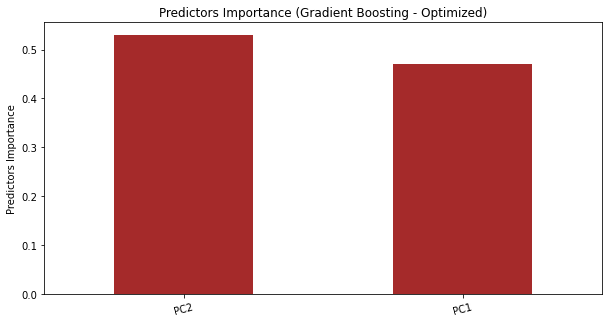

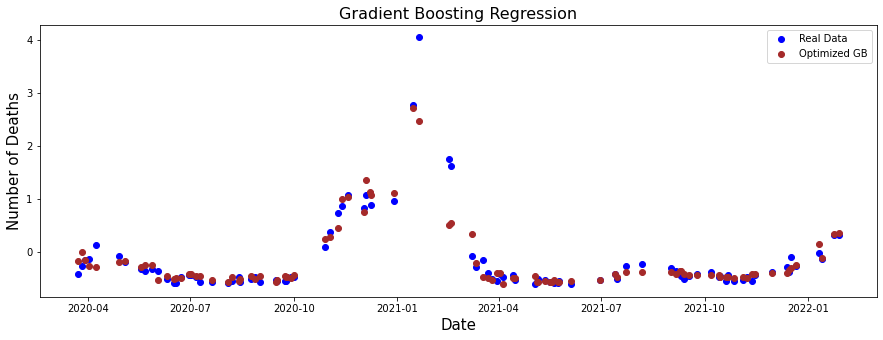

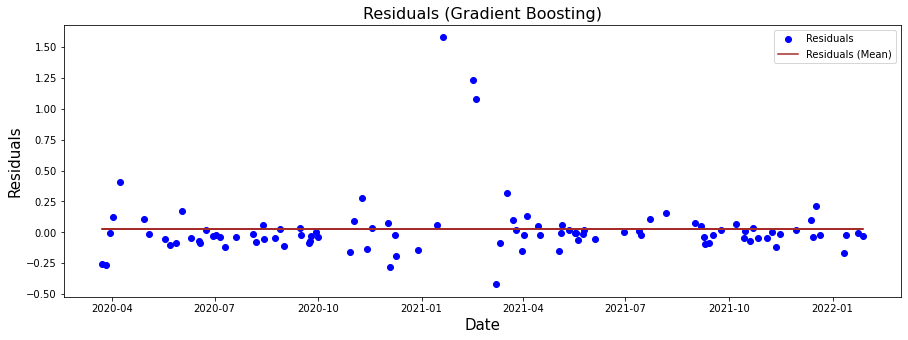

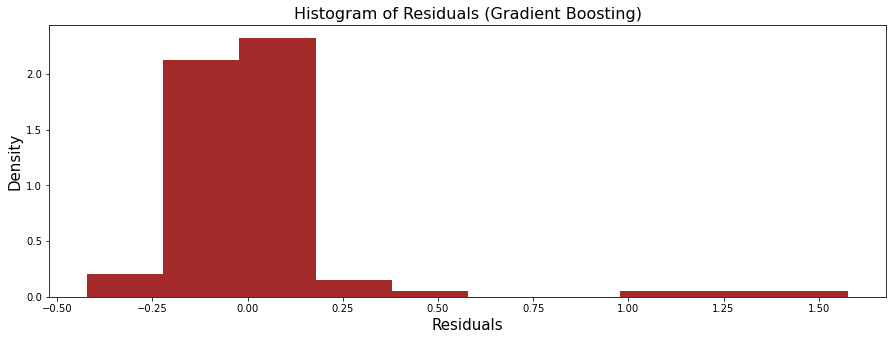

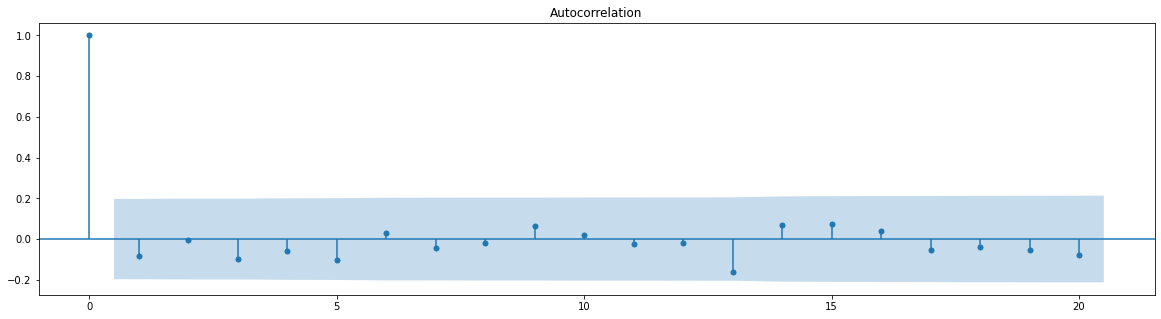

In [22]:
# Gradient Boosting Regression

################
### Fit Model
################
optimize_GB = GradientBoostingRegressor(learning_rate=learning_rate_opt, n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt, subsample=subsample_opt,max_features=max_features_opt, random_state = 8)
optimize_GB.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_GB=list(X_train)
fig, ax = plt.subplots(figsize=(10,5))
pred_importance= pd.Series(optimize_GB.feature_importances_, predictors_GB).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictors Importance')
plt.title('Predictors Importance (Gradient Boosting - Optimized)')
ax.tick_params(axis='x', rotation=15)
optimize_GB_pred=optimize_GB.predict(X_test)
optimize_GB_pred = pd.DataFrame(optimize_GB_pred)
coefs_optimize_GB_df = pd.DataFrame(optimize_GB.feature_importances_)
coefs_optimize_GB_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_GB_df['Predictors'] = predictors_GB
coefs_optimize_GB_df.set_index('Predictors', inplace = True)
coefs_optimize_GB_df = coefs_optimize_GB_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mGradient Boosting Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_GB_df)
    print("-"*120)

#Plotting
optimize_GB_pred.rename(columns = {0: 'Gradient Boosting Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_GB_pred['Date'] = Y_test['Date']
optimize_GB_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o', c='brown', label="Optimized GB")
ax.set_title('Gradient Boosting Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

#Residuals
residuals_optimize_GB_df = pd.DataFrame(Y_test.values - optimize_GB_pred.values,columns=Y_test.columns)
residuals_optimize_GB_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_GB_df.index = Y_test.index
residuals_optimize_GB_df = residuals_optimize_GB_df.reset_index()
residuals_optimize_GB_df['mean'] = residuals_optimize_GB_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_GB_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_GB_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_GB_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_GB_pred.values))



In [23]:
# MLP Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'hidden_layer_sizes': tuple(np.random.randint(1,100,size=3)),'activation': ['relu','tanh','logistic'], 'alpha' : uniform(0.0001,0.1),'solver': ['lbfgs', 'sgd', 'adam']}

optimize_MLP = RandomizedSearchCV(estimator =MLPRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100,random_state = 8)
optimize_MLP.fit(X_train,Y_train)

best_params_MLP = pd.DataFrame(optimize_MLP.best_params_.items())
best_params_MLP= best_params_MLP.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_MLP_list = []
best_score_MLP_list.append(optimize_MLP.best_score_)
best_score_MLP = pd.DataFrame(best_score_MLP_list)
best_score_MLP= best_score_MLP.rename(columns={0: 'Best Score'})

display(best_params_MLP.style.hide_index())
display(best_score_MLP.style.hide_index())

################
### Parameters to list
################
hidden_layer_sizes = best_params_MLP.loc[best_params_MLP['Predictors'] == 'hidden_layer_sizes', 'Best Values'].item()
activation = best_params_MLP.loc[best_params_MLP['Predictors'] == 'activation', 'Best Values'].item()
alpha = best_params_MLP.loc[best_params_MLP['Predictors'] == 'alpha', 'Best Values'].item()
solver = best_params_MLP.loc[best_params_MLP['Predictors'] == 'solver', 'Best Values'].item()


hidden_layer_sizes = int(hidden_layer_sizes)


print("\n\033[1mBest Estimator:\033[0m\n", optimize_MLP.best_estimator_)

C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predictors,Best Values
activation,tanh
alpha,0.054756
hidden_layer_sizes,10
solver,lbfgs


Best Score
0.889599



Best Estimator:
 MLPRegressor(activation='tanh', alpha=0.05475649202408623,
             hidden_layer_sizes=10, solver='lbfgs')


      
Residuals


C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Date,Residuals,mean
0,2020-09-23,-0.029026,0.012818
1,2021-02-18,1.104484,0.012818
2,2020-08-14,-0.072875,0.012818
3,2021-05-20,-0.119907,0.012818
4,2020-04-02,0.114319,0.012818
...,...,...,...
94,2020-08-07,0.093658,0.012818
95,2020-11-18,-0.189125,0.012818
96,2020-06-02,0.107895,0.012818
97,2020-03-30,0.059988,0.012818


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [2.16179596]


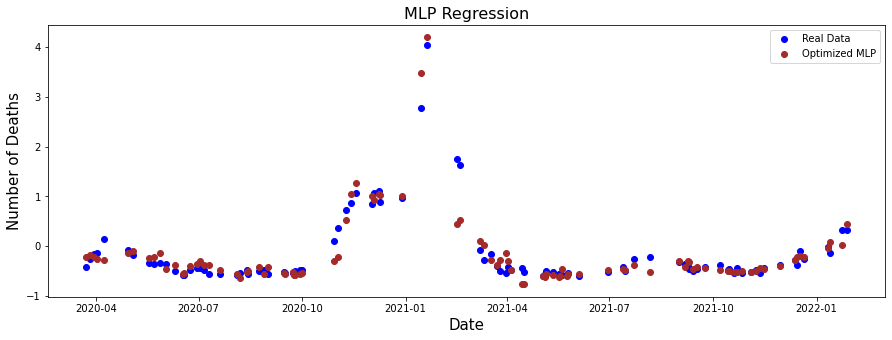

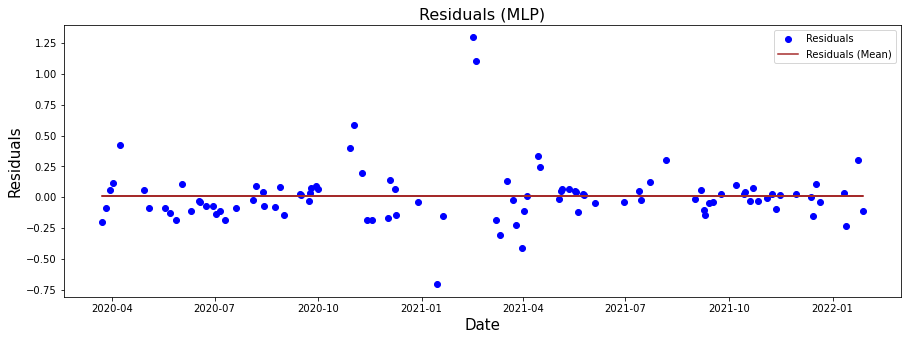

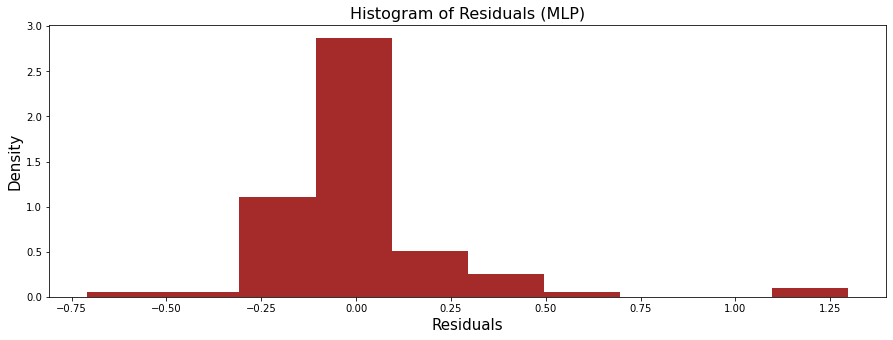

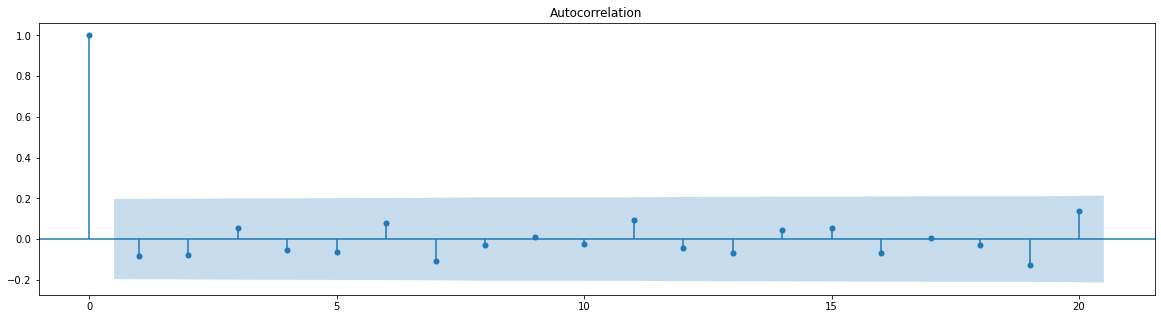

In [24]:
# MLP Regression

################
### Fit Model
################
optimize_MLP = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,activation=activation,alpha=alpha,solver=solver, random_state = 8)
optimize_MLP.fit(X_train,Y_train)

################
### Prediction
################

#Prediction
optimize_MLP_pred=optimize_MLP.predict(X_test)
optimize_MLP_pred = pd.DataFrame(optimize_MLP_pred)

#Plotting
optimize_MLP_pred.rename(columns = {0: 'MLP Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_MLP_pred['Date'] = Y_test['Date']
optimize_MLP_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o', c='brown', label="Optimized MLP")
ax.set_title('MLP Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_MLP_df = pd.DataFrame(Y_test.values - optimize_MLP_pred.values,columns=Y_test.columns)
residuals_optimize_MLP_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_MLP_df.index = Y_test.index
residuals_optimize_MLP_df = residuals_optimize_MLP_df.reset_index()
residuals_optimize_MLP_df['mean'] = residuals_optimize_MLP_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_MLP_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_MLP_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_MLP_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_MLP_pred.values))


In [25]:
# Random Forest Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}

optimize_RF = RandomizedSearchCV(estimator =RandomForestRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_RF.fit(X_train,Y_train)


best_params_RF = pd.DataFrame(optimize_RF.best_params_.items())
best_params_RF= best_params_RF.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_RF_list = []
best_score_RF_list.append(optimize_RF.best_score_)
best_score_RF = pd.DataFrame(best_score_RF_list)
best_score_RF= best_score_RF.rename(columns={0: 'Best Score'})

display(best_params_RF.style.hide_index())
display(best_score_RF.style.hide_index())

################
### Parameters to List
################
max_depth_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'n_estimators', 'Best Values'].item()

max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_RF.best_estimator_)

Predictors,Best Values
max_depth,6
max_features,2
min_samples_leaf,5
min_samples_split,7
n_estimators,776


Best Score
0.855116



Best Estimator:
 RandomForestRegressor(max_depth=6, max_features=2, min_samples_leaf=5,
                      min_samples_split=7, n_estimators=776)


      
Random Forest Model (Optimized)


,Coefficients
Predictors,
PC2,0.549769
PC1,0.450231


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.071704,0.037912
1,2021-02-18,1.061957,0.037912
2,2020-08-14,-0.062583,0.037912
3,2021-05-20,-0.089925,0.037912
4,2020-04-02,0.324022,0.037912
...,...,...,...
94,2020-08-07,-0.070416,0.037912
95,2020-11-18,0.052336,0.037912
96,2020-06-02,0.150987,0.037912
97,2020-03-30,0.046389,0.037912


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [2.15212623]


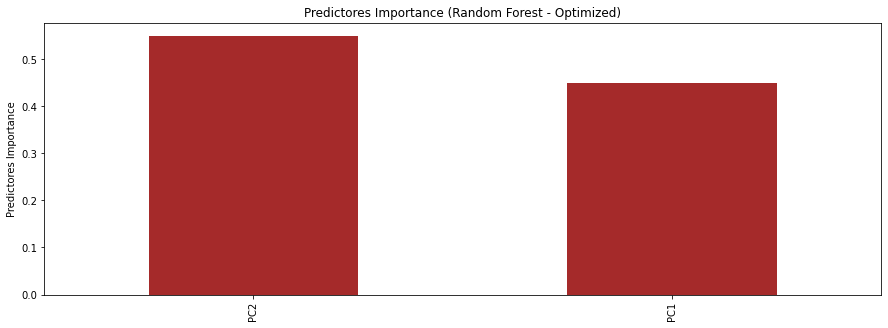

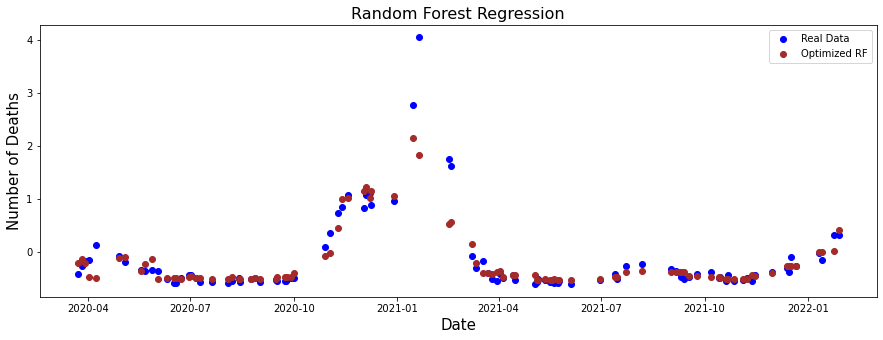

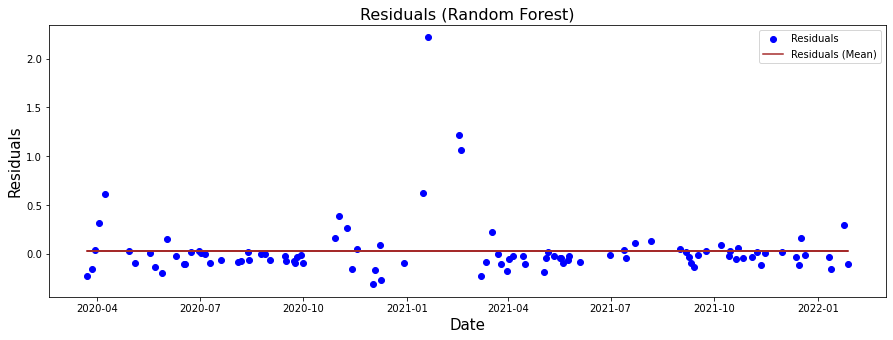

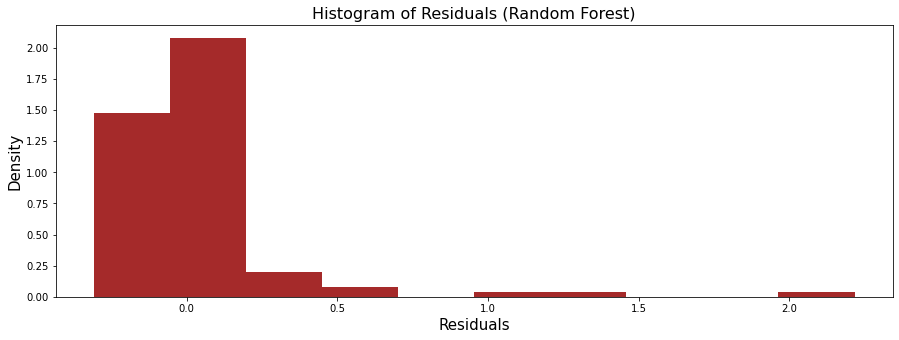

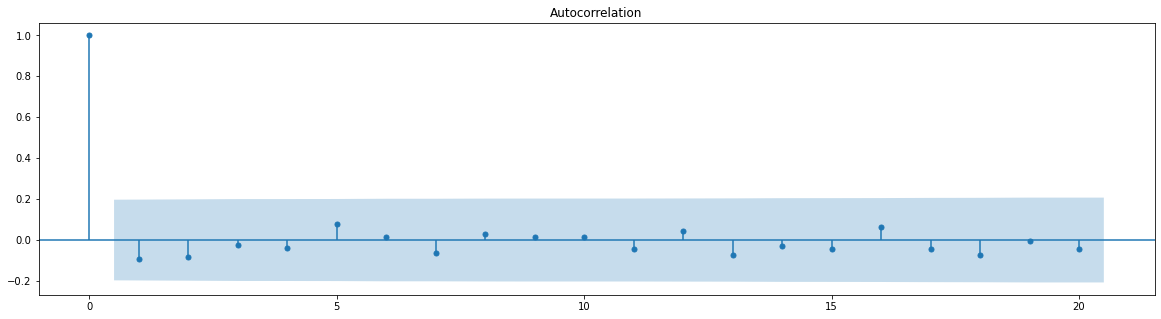

In [26]:
# Random Forest Regression

################
### Fit Model
################
optimize_RF = RandomForestRegressor(n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt,max_features=max_features_opt, random_state = 8)
optimize_RF.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_RF=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance= pd.Series(optimize_RF.feature_importances_, predictors_RF).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Random Forest - Optimized)')
optimize_RF_pred=optimize_RF.predict(X_test)
optimize_RF_pred = pd.DataFrame(optimize_RF_pred)
coefs_optimize_RF_df = pd.DataFrame(optimize_RF.feature_importances_)
coefs_optimize_RF_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_RF_df['Predictors'] = predictors_RF
coefs_optimize_RF_df.set_index('Predictors', inplace = True)
coefs_optimize_RF_df = coefs_optimize_RF_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mRandom Forest Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_RF_df)
    print("-"*120)

# Plotting
optimize_RF_pred.rename(columns = {0: 'Random Forest Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_RF_pred['Date'] = Y_test['Date']
optimize_RF_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o', c='brown', label="Optimized RF")
ax.set_title('Random Forest Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_RF_df = pd.DataFrame(Y_test.values - optimize_RF_pred.values,columns=Y_test.columns)
residuals_optimize_RF_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_RF_df.index = Y_test.index
residuals_optimize_RF_df = residuals_optimize_RF_df.reset_index()
residuals_optimize_RF_df['mean'] = residuals_optimize_RF_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_RF_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_RF_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_RF_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_RF_pred.values))

------------------------------------------------------------------------------------------------------------------------
      
Ridge Regression                                                OLS Regression

------------------------------------------------------------------------------------------------------------------------

MAE                                                             MAE
MAE: 0.41372802440585904                                         MAE: 0.41373212347138777

MSE                                                             MSE
MSE: 0.2722530878595837                                         MSE: 0.27225542791000645

Median Absolute Error                                           Median Absolute Error
Median Absolute Error: 0.3689180171461236                       Median Absolute Error: 0.3689130414079762

Explained Variance Score                                        Explained Variance Score
Explained Variance Score: 0.4913550020719055                   Explaine

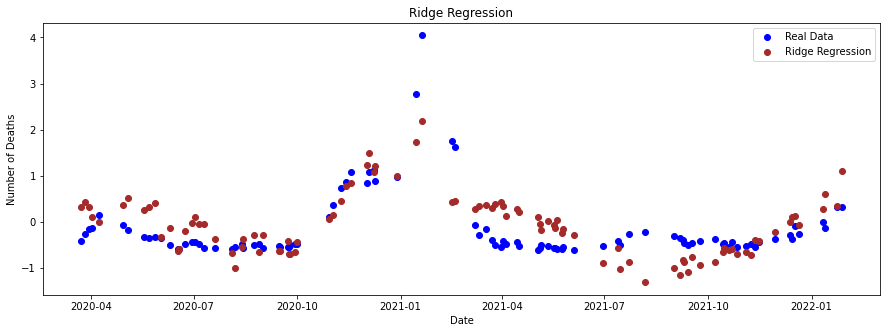

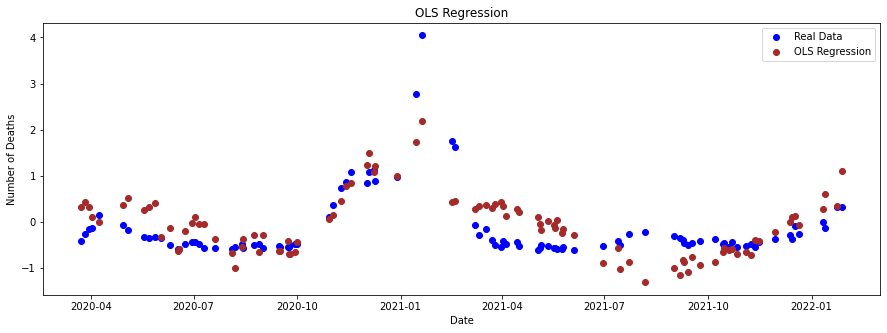

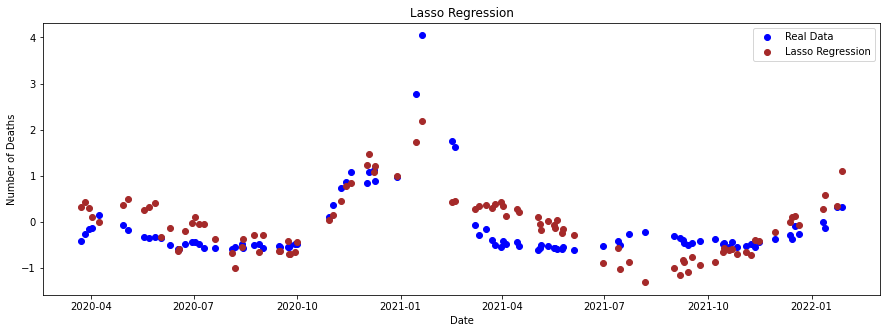

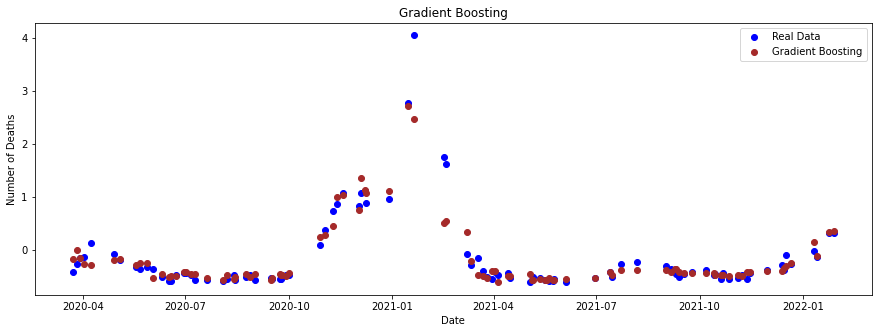

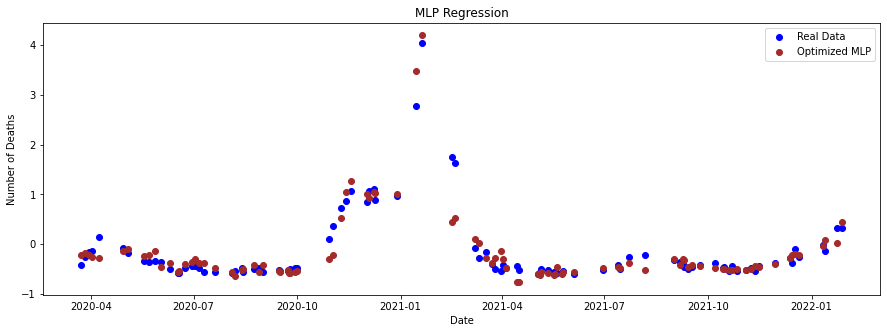

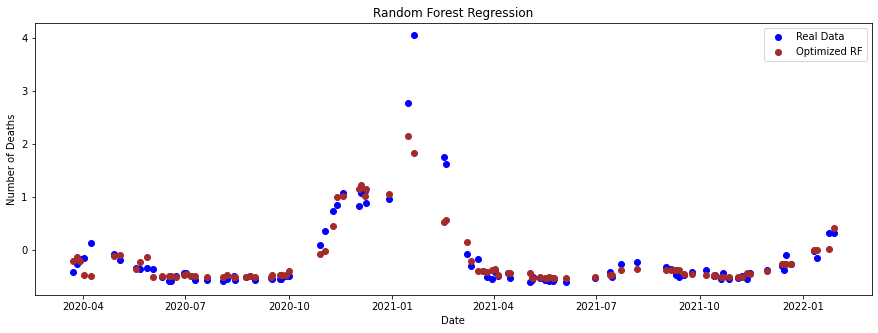

In [27]:
####################### Comparing Models (OLS Regression vs Ridge Regression vs Lasso Regression vs Bayesian Ridge Regression vs Gradient Boosting vs MLP vs Random Forest) #####################
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',  c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o',c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o',c='brown', label="OLS Regression")
ax.set_title('OLS Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o',c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o',c='brown', label="Gradient Boosting")
ax.legend(loc="best")
ax.set_title('Gradient Boosting')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o',c='brown', label="Optimized MLP")
ax.legend(loc="best")
ax.set_title('MLP Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o',c='brown', label="Optimized RF")
ax.legend(loc="best")
ax.set_title('Random Forest Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')

print("-"*120)
print(" "* 5,"\n\033[1mRidge Regression\033[0m"," "* 46, "\033[1mOLS Regression\033[0m\n" )
print("-"*120)

#### OLS and Ridge
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_ols)                                                       )
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_ols))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Ridge)," "* 21 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_ols)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Ridge)," "* 17 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_ols) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Ridge)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, Y_test_pred_ols))

print("-"*120)
print(" "* 5,"\n\033[1mLasso Regression\033[0m"," "* 45, "\033[1m Gradient Boosting Regression\033[0m\n" )
print("-"*120) 

#### Lasso and Gradient Boosting
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_GB_pred))                                                       
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_GB_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Lasso)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_GB_pred)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Lasso)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_GB_pred) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Lasso)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_GB_pred))

print("-"*120)
print(" "* 5,"\n\033[1mMLP Regression\033[0m"," "* 46, "\033[1mRandom Forest Regression\033[0m\n" )
print("-"*120)

### MLP and Random Forest
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, optimize_MLP_pred)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_RF_pred))                                                   
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test,optimize_MLP_pred)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_RF_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_MLP_pred)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_RF_pred))
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m", " " * 38, "\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_MLP_pred)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_RF_pred))
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, optimize_MLP_pred)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_RF_pred))

print("-"*120)
print("\n")
print("-"*120) 